In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
import seaborn as sns
# 한글
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm , rc
font = fm.FontProperties(fname='C:\Windows\Fonts/gulim.ttc').get_name()

# 분석계획
1. 기초적인 EDA 분석
2. 재무데이터를 기반으로 하여 JOIN 및 기초적인 DTC 돌려보기
3. 재무데이터 이상치 처리 및 boxplot 히트맵 ols 등등...
4. 카이제곱 검정등을 활용하여 연관성 파악
5. 평균에 차이가 있는지 ttest_ind 도 해보기
6. 재무외에 범주변수를 통한 기본적인 ols 돌려보기

In [120]:
nb_codzip = pd.read_excel('넘블 챌린지 개방데이터 코드집.xlsx', sheet_name=0)
nb_codzip_finance = pd.read_excel('넘블 챌린지 개방데이터 코드집.xlsx', sheet_name=1)
nb_layout = pd.read_excel('넘블 챌린지 개방데이터 레이아웃.xlsx')
nb_active_out = pd.read_excel('액티브 중소법인 재무보유.xlsx', sheet_name=0)
nb_active_overview = pd.read_excel('액티브 중소법인 재무보유.xlsx', sheet_name=1)
nb_active_oclog = pd.read_excel('액티브 중소법인 재무보유.xlsx', sheet_name=2)
nb_deactive_overview = pd.read_excel('휴폐업 중소법인 재무보유.xlsx', sheet_name=0)
nb_deactive_oclog = pd.read_excel('휴폐업 중소법인 재무보유.xlsx', sheet_name=1)
nb_finance_data = pd.read_csv('재무데이터.txt', encoding='cp949', sep='\t')


In [ ]:
nb_finance_data

,사업자번호,결산년월,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부 채 총 계,...,비유동부채비율(%),부채총계대 매출액(%),총자본회전율(회),재고자산회전율(회),매출채권회전율(회),매입채무회전율(회),미수금,매출원가,무형자산,재고자산
0,1018100340,20181231,2667731.0,127320.0,32346444.0,1179096.0,35014174.0,422872.0,16176067.0,16598939.0,...,8.784100e+01,2.503810e+02,1.630000e-01,1.000000e+12,4.406200e+01,1.000000e+12,NaN,NaN,NaN,NaN
1,1018100340,20191231,2168837.0,94085.0,34151633.0,1209369.0,36320470.0,10553878.0,5240445.0,15794323.0,...,2.550000e+01,2.414000e+02,1.840000e-01,1.000000e+12,5.909200e+01,NaN,NaN,NaN,NaN,NaN
2,1018100340,20201231,2272260.0,78612.0,38329680.0,1091153.0,40601940.0,863144.0,15496117.0,16359261.0,...,6.392100e+01,2.757190e+02,1.540000e-01,1.000000e+12,6.871400e+01,1.000000e+12,NaN,NaN,NaN,NaN
3,1018100340,20211231,1175030.0,273522.0,37135811.0,993025.0,38310842.0,9494272.0,4901383.0,14395654.0,...,2.049500e+01,2.337490e+02,1.560000e-01,1.000000e+12,3.497900e+01,1.000000e+12,3243.0,NaN,NaN,NaN
4,1018100772,20181231,422146.0,17011.0,20370096.0,20352846.0,20792242.0,2684934.0,11404637.0,14089571.0,...,1.701510e+02,1.250082e+03,5.500000e-02,1.000000e+12,6.971100e+01,1.000000e+12,386880.0,524746.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109137,8998800427,20211231,9192992.0,2918329.0,9735232.0,9409374.0,18928223.0,11017981.0,6619380.0,17637362.0,...,5.127880e+02,7.009100e+01,1.477000e+00,6.785000e+00,7.950000e+00,9.792000e+00,331735.0,23370771.0,75451.0,3680509.0
109138,8998800785,20181231,3608435.0,NaN,271541001.0,271541001.0,275149436.0,164335821.0,76480438.0,240816259.0,...,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,NaN,NaN,NaN,NaN
109139,8998800785,20191231,475283.0,NaN,309796969.0,309796969.0,310272251.0,3722434.0,274776917.0,278499351.0,...,1.000000e+12,8.888889e+11,0.000000e+00,1.000000e+12,1.000000e+12,1.000000e+12,NaN,NaN,NaN,NaN
109140,8998800785,20201231,1474607.0,NaN,366181956.0,366181956.0,367656563.0,1593683.0,335844394.0,337438077.0,...,1.000000e+12,8.888889e+11,0.000000e+00,1.000000e+12,1.000000e+12,1.000000e+12,NaN,NaN,NaN,NaN


In [ ]:
nb_active_oclog['now_open'] = 'Y'
nb_active_oclog

,BIZ_NO,END_DATE,STRT_DATE,CLSBZ_GB,STAT_OCR_DATE,now_open
0,5088115592,99991231,20150209,5,NaN,Y
1,5088115592,20150208,20200731,2,NaN,Y
2,1138127100,99991231,20121105,5,NaN,Y
3,1138127100,20121104,20200731,2,NaN,Y
4,1138127100,20121004,20200731,5,NaN,Y
...,...,...,...,...,...,...
4822,6628701486,20220913,20220830,2,NaN,Y
4823,6098801857,99991231,20220921,6,NaN,Y
4824,6098801857,20220920,20220607,3,20220607.0,Y
4825,4988102183,99991231,20220705,5,NaN,Y


In [ ]:
nb_deactive_oclog['now_open'] = 'N'
nb_deactive_oclog

,BIZ_NO,END_DATE,STRT_DATE,CLSBZ_GB,STAT_OCR_DATE,now_open
0,1268145633,99991231,20220518,3,20220518,N
1,1388101749,99991231,20210319,3,20210319,N
2,1068179240,99991231,20200731,3,20191213,N
3,2248114507,99991231,20210531,3,20210531,N
4,1168132785,99991231,20210630,3,20210630,N
...,...,...,...,...,...,...
6835,4808501629,99991231,20211231,3,20211231,N
6836,8018501578,99991231,20211126,3,20211126,N
6837,4118523419,99991231,20220630,3,20220630,N
6838,1738102533,99991231,20220731,3,20220731,N


In [ ]:
# 재무데이터 기준으로 해서 휴폐업 정보 머지
financ_merge = pd.merge(nb_finance_data, nb_active_oclog[['BIZ_NO', 'now_open']], how='left', left_on='사업자번호',right_on='BIZ_NO')
financ_merge = pd.merge(financ_merge, nb_deactive_oclog[['BIZ_NO', 'now_open']], how='left', left_on='사업자번호',right_on='BIZ_NO')
financ_merge

,사업자번호,결산년월,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부 채 총 계,...,매출채권회전율(회),매입채무회전율(회),미수금,매출원가,무형자산,재고자산,BIZ_NO_x,now_open_x,BIZ_NO_y,now_open_y
0,1018100340,20181231,2667731.0,127320.0,32346444.0,1179096.0,35014174.0,422872.0,16176067.0,16598939.0,...,4.406200e+01,1.000000e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1018100340,20191231,2168837.0,94085.0,34151633.0,1209369.0,36320470.0,10553878.0,5240445.0,15794323.0,...,5.909200e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1018100340,20201231,2272260.0,78612.0,38329680.0,1091153.0,40601940.0,863144.0,15496117.0,16359261.0,...,6.871400e+01,1.000000e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1018100340,20211231,1175030.0,273522.0,37135811.0,993025.0,38310842.0,9494272.0,4901383.0,14395654.0,...,3.497900e+01,1.000000e+12,3243.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1018100772,20181231,422146.0,17011.0,20370096.0,20352846.0,20792242.0,2684934.0,11404637.0,14089571.0,...,6.971100e+01,1.000000e+12,386880.0,524746.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110886,8998800427,20211231,9192992.0,2918329.0,9735232.0,9409374.0,18928223.0,11017981.0,6619380.0,17637362.0,...,7.950000e+00,9.792000e+00,331735.0,23370771.0,75451.0,3680509.0,NaN,NaN,NaN,NaN
110887,8998800785,20181231,3608435.0,NaN,271541001.0,271541001.0,275149436.0,164335821.0,76480438.0,240816259.0,...,1.000000e+12,1.000000e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110888,8998800785,20191231,475283.0,NaN,309796969.0,309796969.0,310272251.0,3722434.0,274776917.0,278499351.0,...,1.000000e+12,1.000000e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110889,8998800785,20201231,1474607.0,NaN,366181956.0,366181956.0,367656563.0,1593683.0,335844394.0,337438077.0,...,1.000000e+12,1.000000e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
financ_merge.now_open_y.value_counts(), financ_merge.now_open_x.value_counts()

(N    10363
 Name: now_open_y, dtype: int64,
 Y    2810
 Name: now_open_x, dtype: int64)

In [ ]:
now_open = []
financ_merge.now_open_x.fillna('', inplace=True)
financ_merge.now_open_y.fillna('', inplace=True)
financ_merge ['now_open'] = financ_merge.now_open_x + financ_merge.now_open_y
financ_merge ['now_open']

0          
1          
2          
3          
4          
         ..
110886     
110887     
110888     
110889     
110890     
Name: now_open, Length: 110891, dtype: object

In [ ]:
financ_merge ['now_open'].value_counts()

     97718
N    10363
Y     2810
Name: now_open, dtype: int64

In [ ]:
fn_drop = financ_merge.drop(financ_merge[financ_merge.now_open == ''].index)
fn_drop = fn_drop[fn_drop.columns.drop(['BIZ_NO_x', 'now_open_x', 'BIZ_NO_y', 'now_open_y', '사업자번호', '결산년월'])]
fn_drop

,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부 채 총 계,자본금,이익잉여금(결손금）,...,부채총계대 매출액(%),총자본회전율(회),재고자산회전율(회),매출채권회전율(회),매입채무회전율(회),미수금,매출원가,무형자산,재고자산,now_open
117,2722000.0,1088000.0,1843000.0,1245000.0,4565000.0,243000.0,2396000.0,2639000.0,150000.0,1293000.0,...,4.758400e+01,1.286000e+00,1.000000e+12,5.284000e+00,1.000000e+12,NaN,NaN,NaN,NaN,N
219,2654638.0,460615.0,630395.0,83024.0,3285033.0,655862.0,1520000.0,2175862.0,300000.0,809172.0,...,6.188600e+01,1.063000e+00,1.854000e+00,9.350000e+00,3.388000e+01,5148.0,677309.0,93040.0,1899262.0,N
263,14103736.0,12963574.0,43811786.0,43464482.0,57915522.0,10647758.0,26461172.0,37108929.0,3000000.0,17808355.0,...,6.123200e+01,1.111000e+00,3.296220e+02,5.963000e+00,1.301000e+01,NaN,46505022.0,2933.0,171033.0,Y
264,14103736.0,12963574.0,43811786.0,43464482.0,57915522.0,10647758.0,26461172.0,37108929.0,3000000.0,17808355.0,...,6.123200e+01,1.111000e+00,3.296220e+02,5.963000e+00,1.301000e+01,NaN,46505022.0,2933.0,171033.0,Y
265,13391286.0,11192375.0,43583037.0,42719420.0,56974322.0,30022799.0,1425589.0,31448389.0,3000000.0,22526891.0,...,6.097300e+01,8.980000e-01,2.997310e+02,4.270000e+00,1.290800e+01,63637.0,37181368.0,2133.0,173126.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110874,968641.0,570015.0,302402.0,34862.0,1271043.0,273572.0,148000.0,421572.0,503000.0,346471.0,...,1.143000e+01,2.483000e+00,4.235000e+00,1.126100e+01,1.530000e+01,NaN,3313994.0,NaN,338768.0,N
110875,1047795.0,418015.0,287688.0,20148.0,1335483.0,295180.0,148000.0,443180.0,503000.0,389302.0,...,1.810000e+01,1.880000e+00,7.192000e+00,4.960000e+00,1.121000e+01,NaN,2159834.0,NaN,342578.0,N
110876,8933159.0,NaN,NaN,NaN,8933159.0,3715.0,713032.0,716747.0,459000.0,-9884.0,...,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,NaN,NaN,NaN,NaN,N
110877,9038197.0,NaN,NaN,NaN,9038197.0,626.0,728967.0,729593.0,459000.0,82307.0,...,NaN,0.000000e+00,1.000000e+12,NaN,NaN,NaN,NaN,NaN,NaN,N


In [ ]:
# 데이터 형식 확인
fn_drop.dtypes

사업자번호             int64
결산년월              int64
유동자산            float64
매출채권            float64
비유동자산           float64
유형자산            float64
자산총계            float64
유동부채            float64
비유동부채           float64
부  채  총  계      float64
자본금             float64
이익잉여금(결손금）      float64
자본총계            float64
매출액             float64
판매비와관리비         float64
영업이익（손실）        float64
법인세비용차감전순손익     float64
법인세비용           float64
당기순이익(손실)       float64
기업순이익률(%)       float64
유보액/총자산(%)      float64
유보액/납입자본(%)     float64
매출액총이익률(%)      float64
매출액영업이익률(%)     float64
매출액순이익률(%)      float64
수지비율(%)         float64
경상수지비율          float64
영업비율(%)         float64
금융비용대매출액비율(%    float64
금융비용대부채비율(%)    float64
금융비용대총비용비율(%    float64
부채비율(%)         float64
차입금의존도(%)       float64
자기자본비율(%)       float64
순운전자본비율(%)      float64
유동부채비율(%)       float64
비유동부채비율(%)      float64
부채총계대 매출액(%)    float64
총자본회전율(회)       float64
재고자산회전율(회)      float64
매출채권회전율(회)      float64
매입채무회전율(회)      

In [ ]:
# 재무 결측치 평균값으로 넣어줌
for var in fn_drop.columns[:-1] :
    fn_drop[var].fillna(fn_drop[var].mean(), inplace=True)
fn_drop.isna().sum().sum()

0

In [ ]:
# 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(fn_drop[fn_drop.columns[:-1]], fn_drop[fn_drop.columns[-1]],test_size=0.2, stratify=fn_drop.now_open, random_state=2022)
len(X_train), len(X_test), len(y_train), len(y_test)

(10538, 2635, 10538, 2635)

In [ ]:
# 스케일 데이터 나누기
scaler = MinMaxScaler()
fn_temp = scaler.fit_transform(fn_drop[fn_drop.columns[:-1]])
X_train_sc, X_test_sc, y_train, y_test = train_test_split(fn_temp, fn_drop[fn_drop.columns[-1]],test_size=0.2, stratify=fn_drop.now_open, random_state=2022)
len(X_train_sc), len(X_test_sc), len(y_train), len(y_test)

(10538, 2635, 10538, 2635)

In [ ]:
# dtc
dtc = DecisionTreeClassifier(random_state=2022).fit(X_train, y_train)

In [ ]:
dtc.score(X_test, y_test)

0.92865275142315

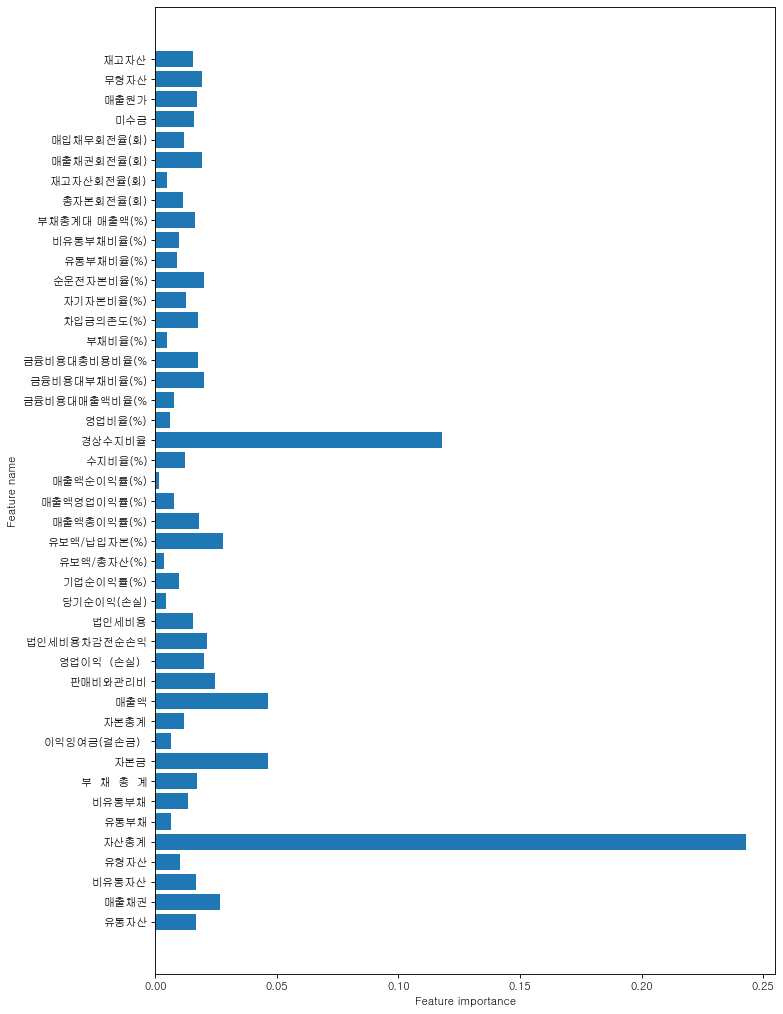

In [ ]:
# dpi는 해상도
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm , rc
font = fm.FontProperties(fname='C:\Windows\Fonts/gulim.ttc').get_name()
rc('font', family=font)
plt.figure(figsize=(10,16), dpi=80)
c_features = len(X_train.columns)
plt.barh(range(c_features), dtc.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), X_train.columns)
plt.show()

0.9400379506641366


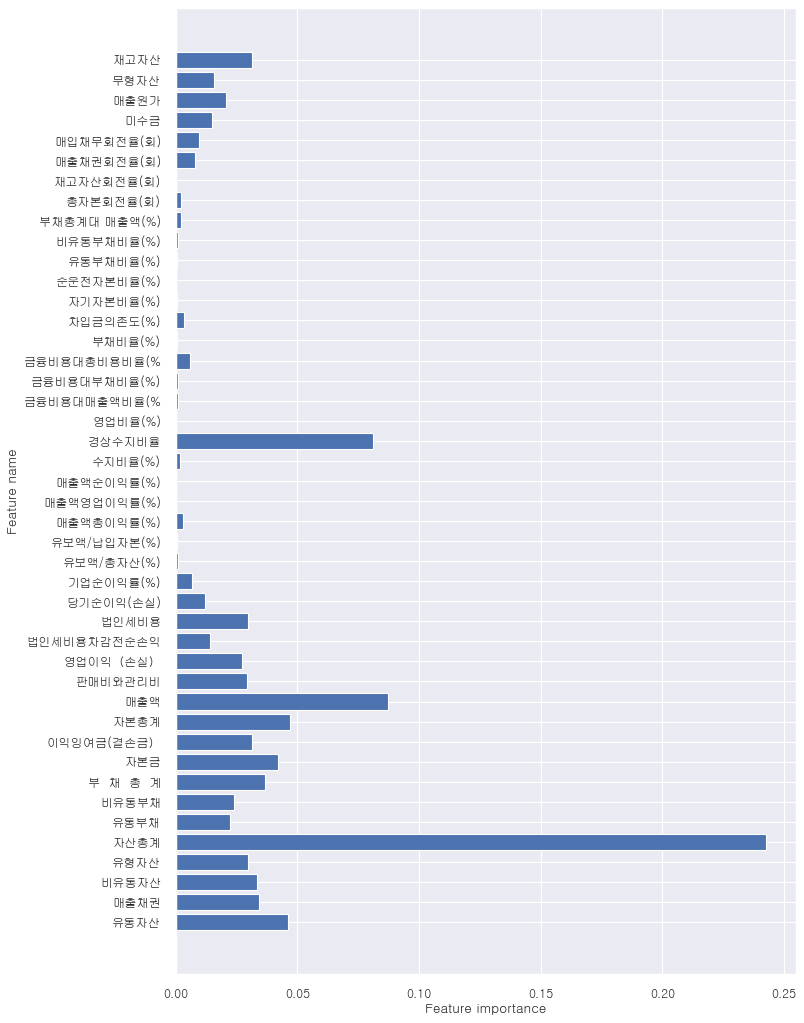

In [ ]:
# dtc 스케일한 데이터
dtc_sc = DecisionTreeClassifier(random_state=2022).fit(X_train_sc, y_train)
print(dtc_sc.score(X_test_sc, y_test))
# dpi는 해상도
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm , rc
font = fm.FontProperties(fname='C:\Windows\Fonts/gulim.ttc').get_name()
rc('font', family=font)
plt.figure(figsize=(10,16), dpi=80)
c_features = len(X_train.columns)
plt.barh(range(c_features), dtc_sc.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), X_train.columns)
plt.show()

<AxesSubplot:>

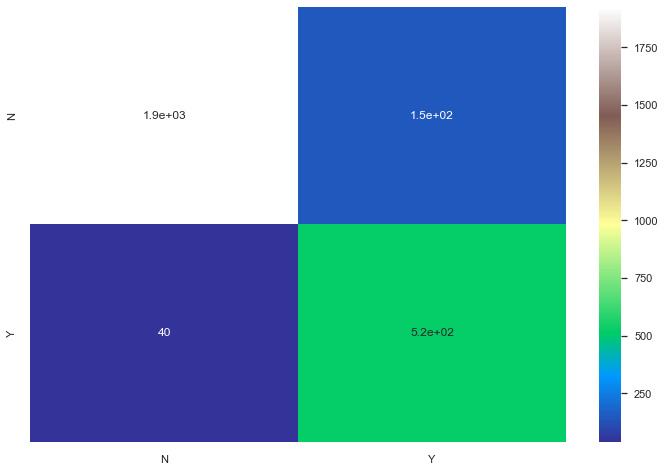

In [ ]:
c = fn_drop.now_open.astype('category')
targets = dict(enumerate(c.cat.categories))
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_test,dtc.predict(X_test))
df_cm = pd.DataFrame(mat, list(targets.values()), list(targets.values()))
sns.set(font_scale=1.0) # for label size
plt.figure(figsize = (12,8))
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12},cmap="terrain")

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\numpy\lib\arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

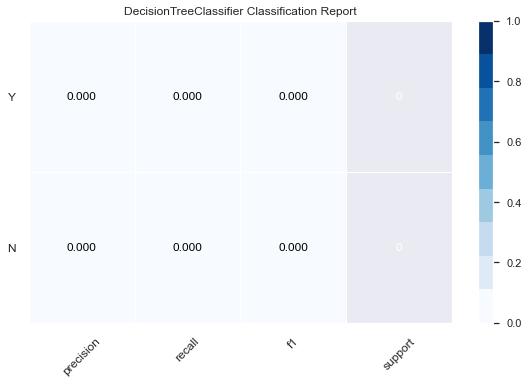

<AxesSubplot:title={'center':'DecisionTreeClassifier Classification Report'}>

In [ ]:
c = fn_drop.now_open.astype('category')
targets = dict(enumerate(c.cat.categories))

from yellowbrick.classifier import ClassificationReport
classes=list(targets.values())
visualizer = ClassificationReport(dtc, classes=classes, support=True,cmap="Blues")

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

In [ ]:
targets

{0: 'N', 1: 'Y'}

In [ ]:
# rfc
rfc = RandomForestClassifier(random_state=2022).fit(X_train, y_train)
rfc.score(X_test, y_test)

0.967741935483871

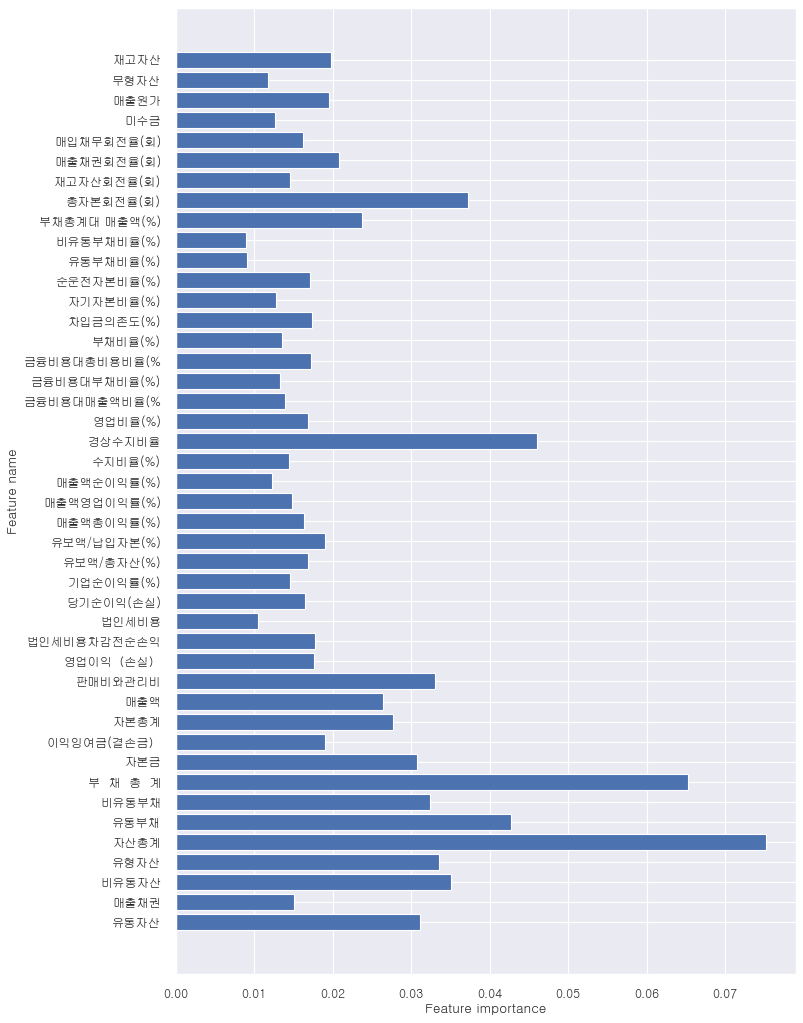

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm , rc
font = fm.FontProperties(fname='C:\Windows\Fonts/gulim.ttc').get_name()
rc('font', family=font)
plt.figure(figsize=(10,16), dpi=80)
c_features = len(X_train.columns)
plt.barh(range(c_features), rfc.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), X_train.columns)
plt.show()

0.9707779886148008


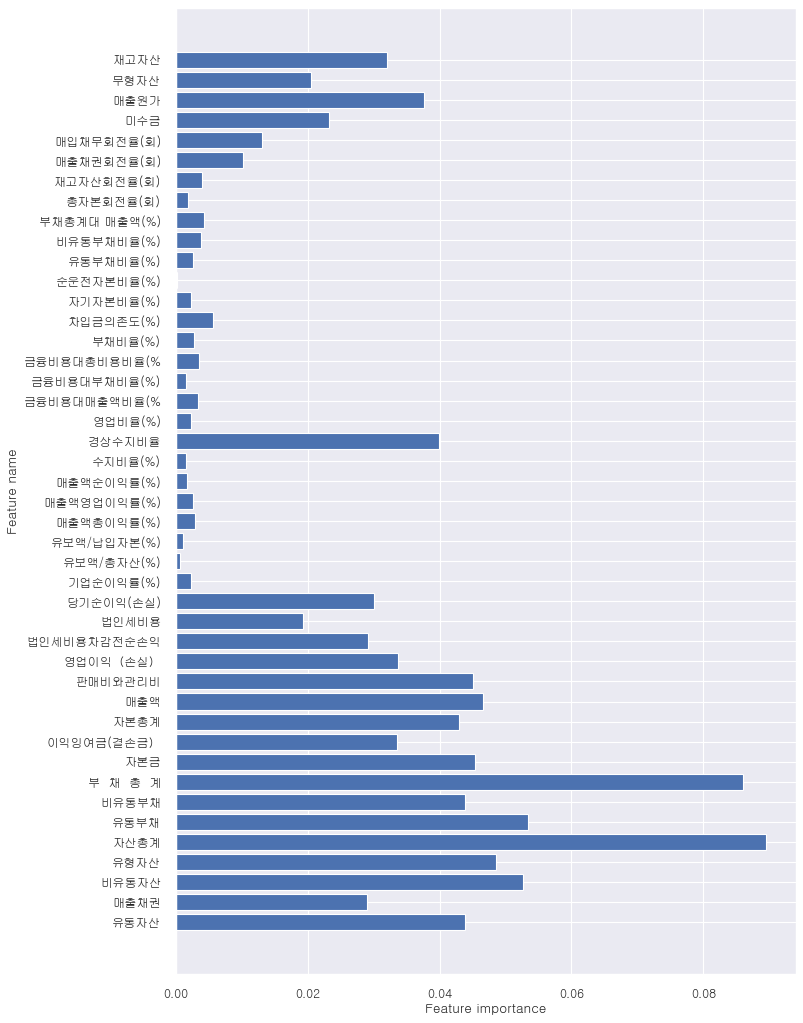

In [ ]:
# rfc 스케일링 데이터
rfc_sc = RandomForestClassifier(random_state=2022).fit(X_train_sc, y_train)
print(rfc_sc.score(X_test_sc, y_test))
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm , rc
font = fm.FontProperties(fname='C:\Windows\Fonts/gulim.ttc').get_name()
rc('font', family=font)
plt.figure(figsize=(10,16), dpi=80)
c_features = len(X_train.columns)
plt.barh(range(c_features), rfc_sc.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), X_train.columns)
plt.show()

0.9730550284629981


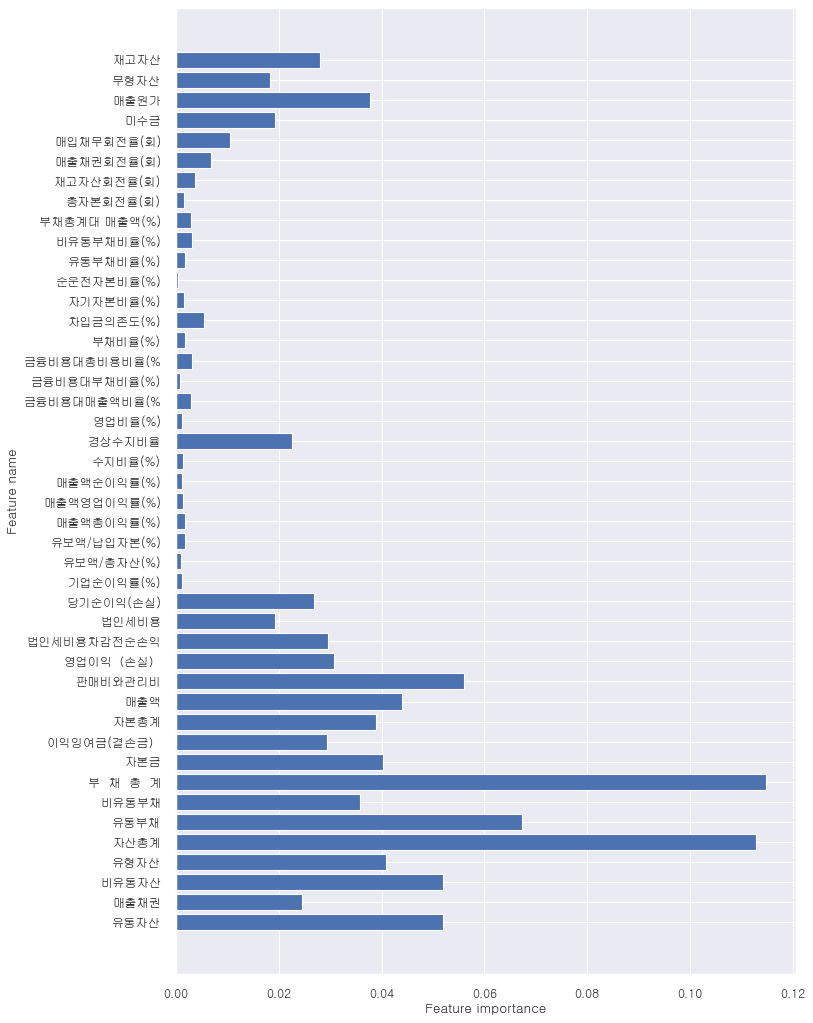

In [ ]:
# rfc 스케일링 데이터
rfc_sc = RandomForestClassifier(random_state=2022, class_weight='balanced_subsample').fit(X_train_sc, y_train)
print(rfc_sc.score(X_test_sc, y_test))
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm , rc
font = fm.FontProperties(fname='C:\Windows\Fonts/gulim.ttc').get_name()
rc('font', family=font)
plt.figure(figsize=(10,16), dpi=80)
c_features = len(X_train.columns)
plt.barh(range(c_features), rfc_sc.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), X_train.columns)
plt.show()

In [ ]:
rfc_sc.classes_

array(['N', 'Y'], dtype=object)

In [ ]:
pred_sc = rfc_sc.predict(X_test_sc)
f1_score(y_test, pred_sc, pos_label='Y')

0.9314336598397149

In [ ]:
pd.DataFrame(fn_temp, columns = fn_drop.columns[:-1]).describe()

,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부 채 총 계,자본금,이익잉여금(결손금）,...,비유동부채비율(%),부채총계대 매출액(%),총자본회전율(회),재고자산회전율(회),매출채권회전율(회),매입채무회전율(회),미수금,매출원가,무형자산,재고자산
count,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,...,1.317300e+04,1.317300e+04,1.317300e+04,1.317300e+04,1.317300e+04,1.317300e+04,13173.000000,13173.000000,13173.000000,13173.000000
mean,0.001969,0.000713,0.003751,0.013100,0.002646,0.002378,0.004381,0.002880,0.003742,0.414459,...,4.490478e-01,1.448990e-01,1.678815e-01,4.475323e-01,2.650908e-01,3.643207e-01,0.002458,0.001093,0.000839,0.006582
std,0.012898,0.011195,0.015989,0.035815,0.013209,0.013881,0.016195,0.014178,0.017302,0.014808,...,4.915665e-01,3.450239e-01,3.737327e-01,4.972018e-01,4.349568e-01,4.696565e-01,0.015745,0.012157,0.011490,0.025153
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000108,0.000047,0.000043,0.000061,0.000128,0.000065,0.000255,0.000101,0.000434,0.414459,...,4.706800e-11,3.151700e-11,4.150000e-13,7.126000e-12,5.887000e-12,1.199400e-11,0.000123,0.000422,0.000103,0.000402
50%,0.000406,0.000249,0.000435,0.001420,0.000743,0.000351,0.001754,0.000601,0.000838,0.414635,...,3.679270e-10,8.889500e-11,1.236000e-12,1.075520e-10,1.528000e-11,6.571700e-11,0.001646,0.000691,0.000839,0.003845
75%,0.001466,0.000713,0.003544,0.013100,0.002479,0.001919,0.004381,0.002561,0.001892,0.415137,...,1.000000e+00,9.953000e-10,3.595000e-12,1.000000e+00,1.000000e+00,1.000000e+00,0.002458,0.001093,0.000839,0.006582
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000


In [ ]:
# 사업자변호별 평균내서 재무데이터
# nb_finance_data_그룹!
financ_gr = nb_finance_data.groupby('사업자번호')[nb_finance_data.columns].mean()
del financ_gr['사업자번호']
financ_gr = financ_gr.reset_index()
financ_gr

,사업자번호,결산년월,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부 채 총 계,...,비유동부채비율(%),부채총계대 매출액(%),총자본회전율(회),재고자산회전율(회),매출채권회전율(회),매입채무회전율(회),미수금,매출원가,무형자산,재고자산
0,1018100340,20196231.0,2.070964e+06,1.433848e+05,3.549089e+07,1.118161e+06,3.756186e+07,5.333542e+06,1.045350e+07,1.578704e+07,...,4.943925e+01,2.503123e+02,1.642500e-01,1.000000e+12,5.171175e+01,1.000000e+12,3243.000000,NaN,NaN,NaN
1,1018100772,20196231.0,4.828732e+05,1.218333e+04,2.089307e+07,2.088182e+07,2.137594e+07,3.142721e+06,1.204274e+07,1.518546e+07,...,1.971870e+02,2.489536e+03,3.875000e-02,1.000000e+12,2.500000e+11,1.000000e+12,441694.500000,5.181350e+05,NaN,NaN
2,1018101126,20196231.0,1.491190e+06,1.021362e+05,3.550742e+07,3.435322e+07,3.699861e+07,8.974535e+06,3.180149e+06,1.215468e+07,...,1.280500e+01,4.684630e+02,8.025000e-02,1.000000e+12,2.581250e+01,1.000000e+12,902.750000,1.516039e+06,527.5,NaN
3,1018101242,20196231.0,5.428135e+05,1.440118e+05,2.465907e+07,2.200939e+07,2.520188e+07,6.706615e+06,2.318500e+06,9.025115e+06,...,1.437100e+01,3.380270e+02,1.075000e-01,1.000000e+12,1.859625e+01,1.000000e+12,NaN,1.178152e+06,NaN,NaN
4,1018103819,20196231.0,1.667547e+06,4.804125e+04,1.150967e+07,1.108649e+07,1.317722e+07,6.715410e+06,1.568218e+06,8.283628e+06,...,3.203725e+01,7.660750e+02,8.225000e-02,1.000000e+12,2.059725e+01,1.000000e+12,12500.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35704,8998700283,20186231.0,1.008218e+06,4.940150e+05,2.950450e+05,2.750500e+04,1.303263e+06,2.843760e+05,1.480000e+05,4.323760e+05,...,1.701150e+01,1.476500e+01,2.181500e+00,5.713500e+00,8.110500e+00,1.325500e+01,NaN,2.736914e+06,NaN,340673.00
35705,8998701263,20191231.0,9.025398e+06,NaN,NaN,NaN,9.025398e+06,1.655333e+03,7.272607e+05,7.289157e+05,...,8.774000e+00,9.444444e+11,3.333333e+11,1.000000e+12,1.000000e+12,1.000000e+12,NaN,NaN,NaN,NaN
35706,8998800150,20196231.0,8.987382e+06,1.454567e+06,2.287665e+07,1.850289e+07,3.186404e+07,1.800650e+07,1.739726e+06,1.974623e+07,...,1.523050e+01,6.216600e+01,1.053750e+00,8.888400e+01,2.279075e+01,1.078650e+01,6738.750000,1.384895e+06,105701.5,416709.00
35707,8998800427,20196231.0,7.198705e+06,2.728476e+06,7.227014e+06,6.594312e+06,1.442572e+07,7.778158e+06,4.469290e+06,1.224745e+07,...,2.438800e+02,2.500000e+11,2.500000e+11,2.500000e+11,2.500000e+11,2.500000e+11,321181.333333,1.542906e+07,442612.0,2826866.75


In [ ]:
# 재무데이터 기준으로 해서 휴폐업 정보 머지
financ_merge_gr = pd.merge(financ_gr, nb_active_oclog[['BIZ_NO', 'now_open']], how='left', left_on='사업자번호',right_on='BIZ_NO')
financ_merge_gr = pd.merge(financ_merge_gr, nb_deactive_oclog[['BIZ_NO', 'now_open']], how='left', left_on='사업자번호',right_on='BIZ_NO')
financ_merge_gr

,사업자번호,결산년월,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부 채 총 계,...,매출채권회전율(회),매입채무회전율(회),미수금,매출원가,무형자산,재고자산,BIZ_NO_x,now_open_x,BIZ_NO_y,now_open_y
0,1018100340,20196231.0,2.070964e+06,1.433848e+05,3.549089e+07,1.118161e+06,3.756186e+07,5.333542e+06,1.045350e+07,1.578704e+07,...,5.171175e+01,1.000000e+12,3243.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1018100772,20196231.0,4.828732e+05,1.218333e+04,2.089307e+07,2.088182e+07,2.137594e+07,3.142721e+06,1.204274e+07,1.518546e+07,...,2.500000e+11,1.000000e+12,441694.500000,5.181350e+05,NaN,NaN,NaN,NaN,NaN,NaN
2,1018101126,20196231.0,1.491190e+06,1.021362e+05,3.550742e+07,3.435322e+07,3.699861e+07,8.974535e+06,3.180149e+06,1.215468e+07,...,2.581250e+01,1.000000e+12,902.750000,1.516039e+06,527.5,NaN,NaN,NaN,NaN,NaN
3,1018101242,20196231.0,5.428135e+05,1.440118e+05,2.465907e+07,2.200939e+07,2.520188e+07,6.706615e+06,2.318500e+06,9.025115e+06,...,1.859625e+01,1.000000e+12,NaN,1.178152e+06,NaN,NaN,NaN,NaN,NaN,NaN
4,1018103819,20196231.0,1.667547e+06,4.804125e+04,1.150967e+07,1.108649e+07,1.317722e+07,6.715410e+06,1.568218e+06,8.283628e+06,...,2.059725e+01,1.000000e+12,12500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36299,8998700283,20186231.0,1.008218e+06,4.940150e+05,2.950450e+05,2.750500e+04,1.303263e+06,2.843760e+05,1.480000e+05,4.323760e+05,...,8.110500e+00,1.325500e+01,NaN,2.736914e+06,NaN,340673.00,NaN,NaN,8.998700e+09,N
36300,8998701263,20191231.0,9.025398e+06,NaN,NaN,NaN,9.025398e+06,1.655333e+03,7.272607e+05,7.289157e+05,...,1.000000e+12,1.000000e+12,NaN,NaN,NaN,NaN,NaN,NaN,8.998701e+09,N
36301,8998800150,20196231.0,8.987382e+06,1.454567e+06,2.287665e+07,1.850289e+07,3.186404e+07,1.800650e+07,1.739726e+06,1.974623e+07,...,2.279075e+01,1.078650e+01,6738.750000,1.384895e+06,105701.5,416709.00,NaN,NaN,NaN,NaN
36302,8998800427,20196231.0,7.198705e+06,2.728476e+06,7.227014e+06,6.594312e+06,1.442572e+07,7.778158e+06,4.469290e+06,1.224745e+07,...,2.500000e+11,2.500000e+11,321181.333333,1.542906e+07,442612.0,2826866.75,NaN,NaN,NaN,NaN


In [ ]:
financ_merge_gr.now_open_x.fillna('', inplace=True)
financ_merge_gr.now_open_y.fillna('', inplace=True)
financ_merge_gr ['now_open'] = financ_merge_gr.now_open_x + financ_merge_gr.now_open_y
financ_merge_gr ['now_open'].value_counts()

     28616
N     6824
Y      864
Name: now_open, dtype: int64

In [ ]:
fn_drop_gr = financ_merge_gr.drop(financ_merge_gr[financ_merge_gr.now_open == ''].index)
fn_drop_gr = fn_drop_gr[fn_drop_gr.columns.drop(['BIZ_NO_x', 'now_open_x', 'BIZ_NO_y', 'now_open_y', '사업자번호', '결산년월'])]
fn_drop_gr

,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부 채 총 계,자본금,이익잉여금(결손금）,...,부채총계대 매출액(%),총자본회전율(회),재고자산회전율(회),매출채권회전율(회),매입채무회전율(회),미수금,매출원가,무형자산,재고자산,now_open
30,2.722000e+06,1088000.0,1843000.00,1245000.00,4.565000e+06,2.430000e+05,2.396000e+06,2.639000e+06,150000.0,1.293000e+06,...,4.758400e+01,1.286000e+00,1.000000e+12,5.284000e+00,1.000000e+12,NaN,NaN,NaN,NaN,N
58,2.654638e+06,460615.0,630395.00,83024.00,3.285033e+06,6.558620e+05,1.520000e+06,2.175862e+06,300000.0,8.091720e+05,...,6.188600e+01,1.063000e+00,1.854000e+00,9.350000e+00,3.388000e+01,5148.000000,677309.0,93040.0,1899262.00,N
70,1.368455e+07,11245542.0,45050214.25,42232428.25,5.873476e+07,1.861106e+07,1.208073e+07,3.069179e+07,3000000.0,2.504413e+07,...,5.582100e+01,9.605000e-01,2.927432e+02,5.188000e+00,1.500525e+01,38017.333333,40682516.5,7988.0,183928.25,Y
71,1.368455e+07,11245542.0,45050214.25,42232428.25,5.873476e+07,1.861106e+07,1.208073e+07,3.069179e+07,3000000.0,2.504413e+07,...,5.582100e+01,9.605000e-01,2.927432e+02,5.188000e+00,1.500525e+01,38017.333333,40682516.5,7988.0,183928.25,Y
74,3.253458e+07,NaN,3000.00,NaN,3.253758e+07,2.954221e+06,NaN,2.954221e+06,2100000.0,2.648336e+07,...,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,NaN,NaN,NaN,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36290,2.265400e+04,NaN,NaN,NaN,2.265400e+04,NaN,NaN,NaN,30000.0,-7.346000e+03,...,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,NaN,NaN,NaN,NaN,N
36291,9.064570e+05,639921.5,3411169.00,3350821.00,4.317626e+06,1.654945e+05,2.732970e+06,2.898464e+06,940000.0,4.791610e+05,...,6.719200e+01,1.179000e+00,4.110100e+01,1.074500e+01,3.196800e+01,NaN,4087559.5,NaN,152957.00,N
36297,1.720135e+05,14294.0,724650.50,724650.50,8.966640e+05,8.011500e+04,6.770795e+05,7.571945e+05,200000.0,-6.053050e+04,...,5.000000e+11,5.000000e+11,5.000000e+11,5.000000e+11,5.000000e+11,NaN,110724.5,NaN,150313.00,N
36299,1.008218e+06,494015.0,295045.00,27505.00,1.303263e+06,2.843760e+05,1.480000e+05,4.323760e+05,503000.0,3.678865e+05,...,1.476500e+01,2.181500e+00,5.713500e+00,8.110500e+00,1.325500e+01,NaN,2736914.0,NaN,340673.00,N


In [ ]:
fn_drop_gr.isna().sum()

유동자산              28
매출채권            1308
비유동자산            191
유형자산             709
자산총계              27
유동부채              63
비유동부채           1888
부  채  총  계        51
자본금               34
이익잉여금(결손금）       112
자본총계              27
매출액              339
판매비와관리비          121
영업이익（손실）          46
법인세비용차감전순손익      114
법인세비용           3133
당기순이익(손실)         37
기업순이익률(%)          0
유보액/총자산(%)         2
유보액/납입자본(%)        2
매출액총이익률(%)        16
매출액영업이익률(%)       16
매출액순이익률(%)        16
수지비율(%)            6
경상수지비율            10
영업비율(%)           16
금융비용대매출액비율(%      54
금융비용대부채비율(%)       1
금융비용대총비용비율(%      48
부채비율(%)            0
차입금의존도(%)          1
자기자본비율(%)          0
순운전자본비율(%)         0
유동부채비율(%)          1
비유동부채비율(%)        27
부채총계대 매출액(%)      16
총자본회전율(회)          0
재고자산회전율(회)         0
매출채권회전율(회)        28
매입채무회전율(회)        35
미수금             2713
매출원가            1368
무형자산            4343
재고자산            2396
now_open           0
dtype: int64

In [ ]:
# nan 값 없는 지표들만 활용
fn_drop_gr_nona = fn_drop_gr.copy()
fn_drop_gr_nona = fn_drop_gr_nona[fn_drop_gr_nona.isna().sum()[fn_drop_gr_nona.isna().sum() == 0].index]
fn_drop_gr_nona

,기업순이익률(%),부채비율(%),자기자본비율(%),순운전자본비율(%),총자본회전율(회),재고자산회전율(회),now_open
30,6.356000e+00,137.020000,4.219100e+01,54.304000,1.286000e+00,1.000000e+12,N
58,1.170000e-01,196.170000,3.376400e+01,60.845000,1.063000e+00,1.854000e+00,N
70,1.259750e+01,116.593500,4.759475e+01,-8.132000,9.605000e-01,2.927432e+02,Y
71,1.259750e+01,116.593500,4.759475e+01,-8.132000,9.605000e-01,2.927432e+02,Y
74,4.813000e+00,9.986000,9.092100e+01,90.911000,1.000000e+12,1.000000e+12,N
...,...,...,...,...,...,...,...
36290,1.000000e+12,0.000000,1.000000e+12,100.000000,1.000000e+12,1.000000e+12,N
36291,6.783000e+00,203.617500,3.295950e+01,16.139500,1.179000e+00,4.110100e+01,N
36297,5.000000e+11,542.879000,1.000000e+12,10.224000,5.000000e+11,5.000000e+11,N
36299,4.645500e+00,49.664000,6.681650e+01,55.542500,2.181500e+00,5.713500e+00,N


In [ ]:
fn_drop_gr.dropna()

,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부 채 총 계,자본금,이익잉여금(결손금）,...,부채총계대 매출액(%),총자본회전율(회),재고자산회전율(회),매출채권회전율(회),매입채무회전율(회),미수금,매출원가,무형자산,재고자산,now_open
58,2.654638e+06,4.606150e+05,6.303950e+05,8.302400e+04,3.285033e+06,6.558620e+05,1.520000e+06,2.175862e+06,300000.0,809172.0,...,61.886000,1.063000e+00,1.854000e+00,9.350000,3.388000e+01,5148.000000,6.773090e+05,9.304000e+04,1.899262e+06,N
70,1.368455e+07,1.124554e+07,4.505021e+07,4.223243e+07,5.873476e+07,1.861106e+07,1.208073e+07,3.069179e+07,3000000.0,25044133.0,...,55.821000,9.605000e-01,2.927432e+02,5.188000,1.500525e+01,38017.333333,4.068252e+07,7.988000e+03,1.839282e+05,Y
71,1.368455e+07,1.124554e+07,4.505021e+07,4.223243e+07,5.873476e+07,1.861106e+07,1.208073e+07,3.069179e+07,3000000.0,25044133.0,...,55.821000,9.605000e-01,2.927432e+02,5.188000,1.500525e+01,38017.333333,4.068252e+07,7.988000e+03,1.839282e+05,Y
106,2.608781e+06,6.343037e+05,2.925654e+06,8.897203e+05,5.534435e+06,2.322491e+06,2.095245e+06,4.417736e+06,200000.0,916699.0,...,26.466333,3.333333e+11,3.333333e+11,40.057667,2.081430e+02,980.000000,6.791664e+06,3.113333e+02,1.871017e+05,Y
107,2.608781e+06,6.343037e+05,2.925654e+06,8.897203e+05,5.534435e+06,2.322491e+06,2.095245e+06,4.417736e+06,200000.0,916699.0,...,26.466333,3.333333e+11,3.333333e+11,40.057667,2.081430e+02,980.000000,6.791664e+06,3.113333e+02,1.871017e+05,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35969,4.182508e+06,1.433888e+06,5.690753e+06,5.354072e+06,9.873262e+06,4.417332e+06,4.182647e+06,8.599980e+06,550000.0,723282.0,...,44.625500,2.670000e+00,2.385900e+01,16.295000,6.999000e+00,163865.000000,1.739047e+07,3.242000e+03,7.756520e+05,N
35986,3.216467e+07,9.453614e+06,2.343834e+07,2.138633e+06,5.560301e+07,3.009288e+07,1.185998e+07,4.195286e+07,15814655.5,-82507476.5,...,352.662000,2.325000e-01,5.000000e+11,1.361500,1.524700e+01,133916.000000,1.965454e+07,2.538903e+06,2.951835e+06,N
36003,5.549870e+05,2.764650e+05,6.796300e+04,5.463000e+03,6.229500e+05,3.406295e+05,8.000000e+03,3.446295e+05,50000.0,228320.5,...,15.718500,3.768000e+00,1.197250e+01,8.311000,5.000000e+11,12.000000,1.709948e+06,3.500000e+04,2.364820e+05,N
36099,1.039634e+06,2.782810e+05,2.280380e+05,8.700000e+01,1.267673e+06,4.876360e+05,5.731990e+05,1.060835e+06,200000.0,6837.0,...,149.117000,6.190000e-01,1.518000e+00,3.542000,2.362700e+02,768.000000,6.936180e+05,6.455000e+03,3.872850e+05,N


In [ ]:
for var in fn_drop_gr.columns[:-1] :
    fn_drop_gr[var].fillna(fn_drop_gr[var].median(), inplace=True)
fn_drop_gr.isna().sum().sum()

0

In [ ]:
# 스케일 데이터 나누기
scaler = MinMaxScaler()
fn_temp = scaler.fit_transform(fn_drop_gr[fn_drop_gr.columns[:-1]])
X_train_sc, X_test_sc, y_train, y_test = train_test_split(fn_temp, fn_drop_gr[fn_drop_gr.columns[-1]],test_size=0.2, stratify=fn_drop_gr.now_open, random_state=2022)
len(X_train_sc), len(X_test_sc), len(y_train), len(y_test)

(6150, 1538, 6150, 1538)

0.9616384915474643


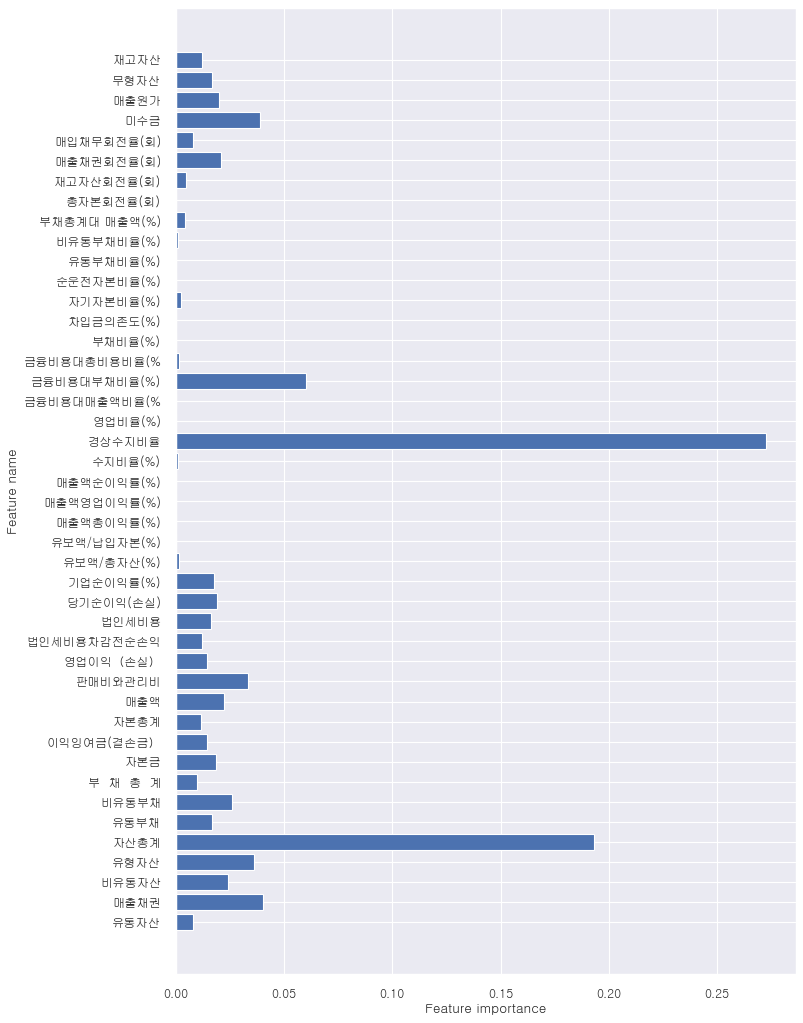

In [ ]:
# dtc 스케일한 데이터
dtc_sc = DecisionTreeClassifier(random_state=2022).fit(X_train_sc, y_train)
print(dtc_sc.score(X_test_sc, y_test))
# dpi는 해상도
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm , rc
font = fm.FontProperties(fname='C:\Windows\Fonts/gulim.ttc').get_name()
rc('font', family=font)
plt.figure(figsize=(10,16), dpi=80)
c_features = len(X_train.columns)
plt.barh(range(c_features), dtc_sc.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), X_train.columns)
plt.show()

0.9798439531859557


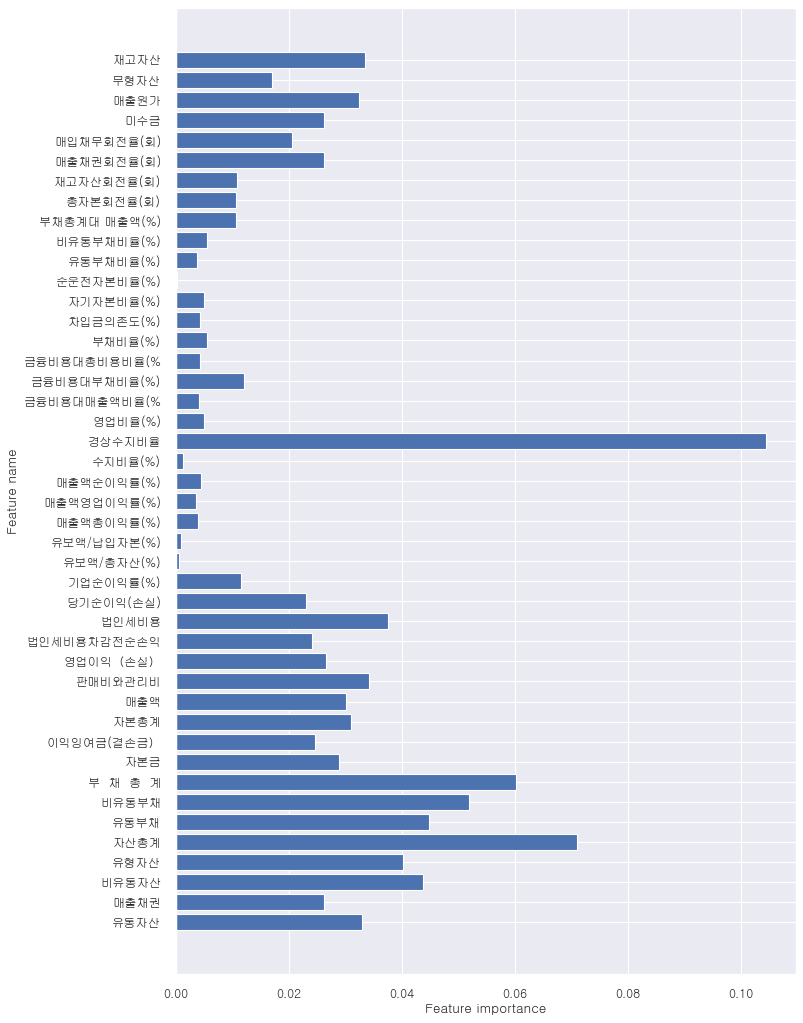

In [ ]:
# rfc 스케일링 데이터
rfc_sc = RandomForestClassifier(random_state=2022).fit(X_train_sc, y_train)
print(rfc_sc.score(X_test_sc, y_test))
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm , rc
font = fm.FontProperties(fname='C:\Windows\Fonts/gulim.ttc').get_name()
rc('font', family=font)
plt.figure(figsize=(10,16), dpi=80)
c_features = len(X_train.columns)
plt.barh(range(c_features), rfc_sc.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), X_train.columns)
plt.show()

In [ ]:
rfc_sc.classes_

array(['N', 'Y'], dtype=object)

In [ ]:
# 난값 없는 지표들로만 돌렸을때
fn_drop_gr_nona

,기업순이익률(%),부채비율(%),자기자본비율(%),순운전자본비율(%),총자본회전율(회),재고자산회전율(회),now_open
30,6.356000e+00,137.020000,4.219100e+01,54.304000,1.286000e+00,1.000000e+12,N
58,1.170000e-01,196.170000,3.376400e+01,60.845000,1.063000e+00,1.854000e+00,N
70,1.259750e+01,116.593500,4.759475e+01,-8.132000,9.605000e-01,2.927432e+02,Y
71,1.259750e+01,116.593500,4.759475e+01,-8.132000,9.605000e-01,2.927432e+02,Y
74,4.813000e+00,9.986000,9.092100e+01,90.911000,1.000000e+12,1.000000e+12,N
...,...,...,...,...,...,...,...
36290,1.000000e+12,0.000000,1.000000e+12,100.000000,1.000000e+12,1.000000e+12,N
36291,6.783000e+00,203.617500,3.295950e+01,16.139500,1.179000e+00,4.110100e+01,N
36297,5.000000e+11,542.879000,1.000000e+12,10.224000,5.000000e+11,5.000000e+11,N
36299,4.645500e+00,49.664000,6.681650e+01,55.542500,2.181500e+00,5.713500e+00,N


In [ ]:
# 스케일 데이터 나누기
scaler = MinMaxScaler()
fn_temp = scaler.fit_transform(fn_drop_gr_nona[fn_drop_gr_nona.columns[:-1]])
X_train_sc, X_test_sc, y_train, y_test = train_test_split(fn_temp, fn_drop_gr_nona[fn_drop_gr_nona.columns[-1]],test_size=0.2, stratify=fn_drop_gr_nona.now_open, random_state=2022)
len(X_train_sc), len(X_test_sc), len(y_train), len(y_test)

(6150, 1538, 6150, 1538)

0.9148244473342002


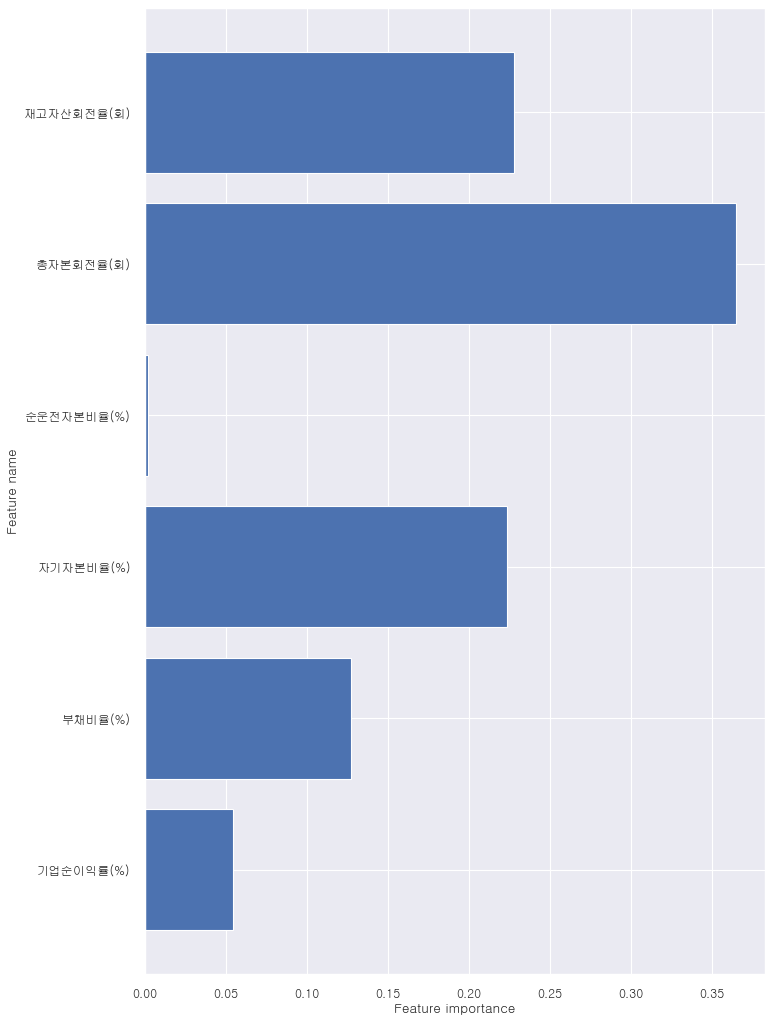

In [ ]:
# dtc 스케일한 데이터
dtc_sc = DecisionTreeClassifier(random_state=2022).fit(X_train_sc, y_train)
print(dtc_sc.score(X_test_sc, y_test))
# dpi는 해상도
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm , rc
font = fm.FontProperties(fname='C:\Windows\Fonts/gulim.ttc').get_name()
rc('font', family=font)
plt.figure(figsize=(10,16), dpi=80)
c_features = len(fn_drop_gr_nona.columns[:-1])
plt.barh(range(c_features), dtc_sc.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), fn_drop_gr_nona.columns[:-1])
plt.show()

0.9148244473342002


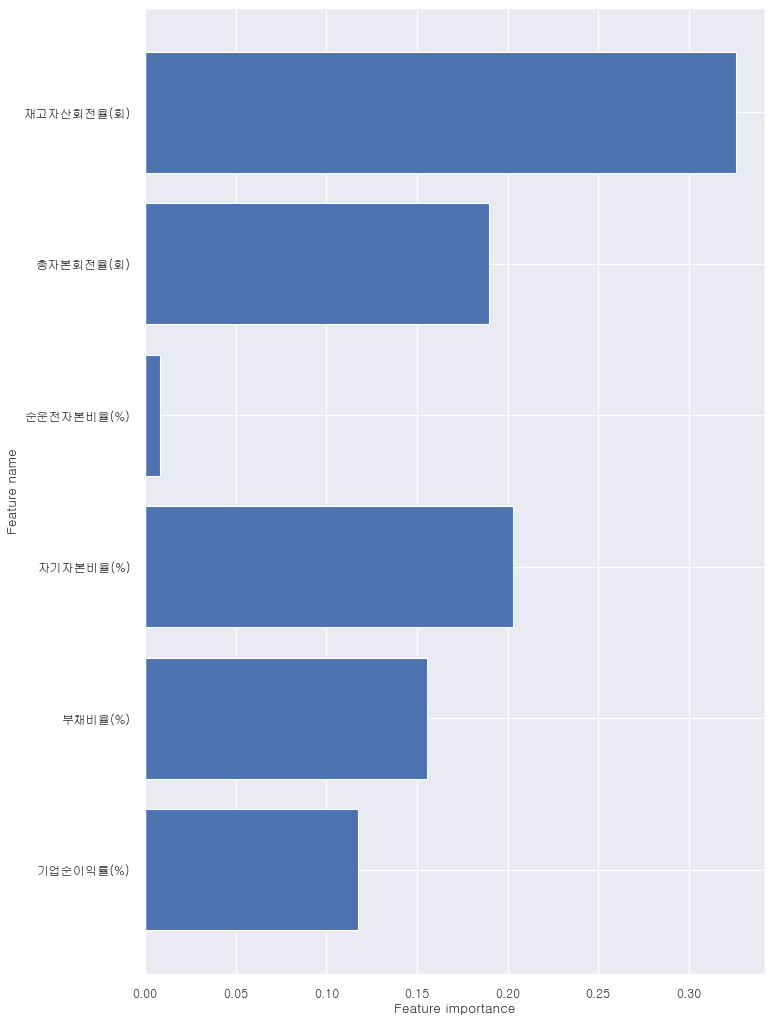

In [ ]:
# rfc 스케일링 데이터
rfc_sc = RandomForestClassifier(random_state=2022).fit(X_train_sc, y_train)
print(rfc_sc.score(X_test_sc, y_test))
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm , rc
font = fm.FontProperties(fname='C:\Windows\Fonts/gulim.ttc').get_name()
rc('font', family=font)
plt.figure(figsize=(10,16), dpi=80)
c_features = len(fn_drop_gr_nona.columns[:-1])
plt.barh(range(c_features), rfc_sc.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), fn_drop_gr_nona.columns[:-1])
plt.show()

In [ ]:
nb_deactive_oclog.STAT_OCR_DATE.value_counts().reset_index().sort_values(by='index')

,index,STAT_OCR_DATE
915,20180201,1
721,20180228,2
936,20180301,1
922,20180313,1
859,20180316,1
...,...,...
578,20220727,3
251,20220728,6
362,20220729,5
26,20220731,34


In [ ]:
nb_deactive_oclog.CLSBZ_GB.value_counts().reset_index()

,index,CLSBZ_GB
0,3,6838
1,5,1
2,6,1


In [ ]:
nb_active_oclog.CLSBZ_GB.value_counts().reset_index()

,index,CLSBZ_GB
0,6,1264
1,3,1239
2,2,1168
3,5,1155
4,4,1


In [ ]:
nb_layout

,순서,테이블명,영문칼럼명,한글칼럼명,칼럼형식,디폴트값,NULL여부,비고
0,1.0,기업개요,BIZ_NO,사업자등록번호,VARCHAR2(10),'Z',N,NaN
1,2.0,기업개요,CMP_PFIX_NM,기업접두명,VARCHAR2(64),NaN,Y,NaN
2,3.0,기업개요,CMP_NM,기업명,VARCHAR2(128),NaN,Y,NaN
3,4.0,기업개요,CMP_SFIX_NM,기업접미명,VARCHAR2(64),NaN,Y,NaN
4,5.0,기업개요,CMP_ENM,기업영문명,VARCHAR2(256),NaN,Y,NaN
5,6.0,기업개요,BZ_TYP,업종,VARCHAR2(3),NaN,N,NaN
6,7.0,기업개요,CMP_SCL,기업규모,VARCHAR2(3),NaN,Y,NaN
7,8.0,기업개요,PBCO_GB,공기업구분 1.공기업 2.일반기업,VARCHAR2(3),NaN,N,NaN
8,9.0,기업개요,PSN_CORP_GB,개인법인구분 1.법인 2.개인,VARCHAR2(3),NaN,N,NaN
9,10.0,기업개요,HDOF_BR_GB,본점지점구분 1.본점 2.지점,VARCHAR2(3),NaN,N,NaN


In [ ]:
nb_active

,BIZ_NO,CMP_PFIX_NM,CMP_NM1,CMP_SFIX_NM,CMP_ENM,BZ_TYP,CMP_SCL,PBCO_GB,PSN_CORP_GB,HDOF_BR_GB,...,MDSCO_PRTC_YN,HDOF_CMP_CD,ESTB_DATE,ESTB_GB,LIST_DATE,MN_BIZ_CONT,NATN_NM,HOMEPAGE_URL,CEO_NM,EMP_CNT
0,1138111739,NaN,한일가스산업,(주),"HANIL GAS IND. CO.,LTD.",M,2,2,1,1,...,N,NaN,19660419.0,1,NaN,LP Gas 충전 및 판매업,NaN,www.hanilgas.com,홍순철외 1명,43.0
1,2078132193,(주),엠피아이,NaN,"EMPIALEE CO.,LTD.",M,2,2,1,1,...,N,NaN,19910806.0,1,NaN,가죽 및 대용가죽제품 제조업,NaN,www.mastercnd.co.kr,이스테판상수외 1명,35.0
2,1318167565,NaN,도영운수,(주),"DOYOUNG TRANSPORTATION CO.,LTD.",M,2,2,1,1,...,N,NaN,20011030.0,1,NaN,시내버스업,NaN,transport@naver.com,김명화,149.0
3,5048128251,(주),중원산업,NaN,"JOONGWON INDUSTRIAL CO.,LTD.",M,2,2,1,1,...,N,NaN,19990112.0,1,NaN,자동차 부품 제조,NaN,www.koreajw.com,김명구,75.0
4,1098164260,(주),카타나골프,NaN,"CATANA GOLF CO.,LTD.",M,2,2,1,1,...,N,NaN,20000531.0,1,NaN,골프용품 전반의 제조 및 수출업,NaN,NaN,김홍득,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28977,8048101453,NaN,제이앤인베스트먼트,NaN,J&INVESTMENT,M,2,2,1,1,...,N,NaN,20191206.0,1,NaN,경영컨설팅업,NaN,NaN,정경태,0.0
28978,8028701430,NaN,디앤엠개발,(주),"DNM Development Co., Ltd.",M,2,2,1,1,...,N,NaN,20200402.0,1,NaN,비주거용 건물 임대업,NaN,NaN,송성현,1.0
28979,4268501421,NaN,마스비 건축연구소,NaN,NaN,M,2,2,1,2,...,N,1220726.0,19900108.0,1,NaN,"BIM용역, 엔지니어링컨설팅",NaN,NaN,김태남,81.0
28980,6518502462,(주),건설레미콘의정부공장,NaN,"Construction Remicon Uijeongbu Factory Co., Ltd.",M,2,2,1,2,...,N,1583116.0,20220615.0,1,NaN,레미콘,NaN,NaN,이미성,26.0


In [ ]:
pd.read_excel('액티브 중소법인 재무보유.xlsx', sheet_name=1)

,BIZ_NO,CMP_PFIX_NM,CMP_NM,CMP_NM1,CMP_SFIX_NM,CMP_ENM,BZ_TYP,CMP_TYP,CMP_SCL,PBCO_GB,...,TAXN_TYP,HDOF_CMP_CD,ESTB_DATE,ESTB_GB,LIST_DATE,MN_BIZ_CONT,NATN_NM,HOMEPAGE_URL,CEO_NM,EMP_CNT
0,2218116923,NaN,NaN,신우종합건설,(주),"Shinu General Construction Co., Ltd.",M,4,2,2,...,3.0,NaN,20000807.0,1.0,NaN,토목공사업,NaN,NaN,김주대외 1명,12.0
1,1138111739,NaN,한일가스산업(주),한일가스산업,(주),"HANIL GAS IND. CO.,LTD.",M,3,2,2,...,3.0,NaN,19660419.0,1.0,NaN,LP Gas 충전 및 판매업,NaN,www.hanilgas.com,홍순철외 1명,43.0
2,1108146490,(주),NaN,랩솔루션,NaN,Lab Solution,M,4,2,2,...,3.0,NaN,20000612.0,1.0,NaN,기체분석기 등,NaN,www.lab-solution.com,김봉철,3.0
3,3128134737,(주),NaN,고려인삼제품공사,NaN,"KOREAN GINSENG PRODUCT CO., LTD",M,4,2,2,...,3.0,NaN,19920301.0,1.0,NaN,"다류, 차, 인삼제품, 음료, 코코아가공품, 커피",NaN,www.kitea.co.kr,박경출,24.0
4,2078132193,(주),(주)엠피아이,엠피아이,NaN,"EMPIALEE CO.,LTD.",M,3,2,2,...,3.0,NaN,19910806.0,1.0,NaN,가죽 및 대용가죽제품 제조업,NaN,www.mastercnd.co.kr,이스테판상수외 1명,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198646,6208701973,(주),NaN,동화피앤피,NaN,"Donghwa P&P Co., Ltd.",M,4,2,2,...,3.0,NaN,20200925.0,1.0,NaN,"인쇄, 지함, 코팅, 디자인",NaN,NaN,홍종오,NaN
198647,3688702720,NaN,NaN,중앙종합조경,(주),NaN,M,4,2,2,...,3.0,NaN,20220721.0,1.0,NaN,"조경공사, 토목공사",NaN,NaN,서영희,13.0
198648,4868602701,(주),NaN,세움웹,NaN,NaN,M,5,2,2,...,3.0,NaN,20220801.0,1.0,NaN,"소프트웨어 자문, 개발 및 공급업",NaN,NaN,이대홍,NaN
198649,2528101633,(주),NaN,에프에이앤컴퍼니,NaN,"fa & company, inc.",M,4,2,2,...,NaN,NaN,20200106.0,1.0,NaN,UX디자인 및 프로그래밍,NaN,NaN,이해성,NaN


In [ ]:
nb_active_overview

,BIZ_NO,CMP_PFIX_NM,CMP_NM,CMP_NM1,CMP_SFIX_NM,CMP_ENM,BZ_TYP,CMP_TYP,CMP_SCL,PBCO_GB,...,TAXN_TYP,HDOF_CMP_CD,ESTB_DATE,ESTB_GB,LIST_DATE,MN_BIZ_CONT,NATN_NM,HOMEPAGE_URL,CEO_NM,EMP_CNT
0,2218116923,NaN,NaN,신우종합건설,(주),"Shinu General Construction Co., Ltd.",M,4,2,2,...,3.0,NaN,20000807.0,1.0,NaN,토목공사업,NaN,NaN,김주대외 1명,12.0
1,1138111739,NaN,한일가스산업(주),한일가스산업,(주),"HANIL GAS IND. CO.,LTD.",M,3,2,2,...,3.0,NaN,19660419.0,1.0,NaN,LP Gas 충전 및 판매업,NaN,www.hanilgas.com,홍순철외 1명,43.0
2,1108146490,(주),NaN,랩솔루션,NaN,Lab Solution,M,4,2,2,...,3.0,NaN,20000612.0,1.0,NaN,기체분석기 등,NaN,www.lab-solution.com,김봉철,3.0
3,3128134737,(주),NaN,고려인삼제품공사,NaN,"KOREAN GINSENG PRODUCT CO., LTD",M,4,2,2,...,3.0,NaN,19920301.0,1.0,NaN,"다류, 차, 인삼제품, 음료, 코코아가공품, 커피",NaN,www.kitea.co.kr,박경출,24.0
4,2078132193,(주),(주)엠피아이,엠피아이,NaN,"EMPIALEE CO.,LTD.",M,3,2,2,...,3.0,NaN,19910806.0,1.0,NaN,가죽 및 대용가죽제품 제조업,NaN,www.mastercnd.co.kr,이스테판상수외 1명,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198646,6208701973,(주),NaN,동화피앤피,NaN,"Donghwa P&P Co., Ltd.",M,4,2,2,...,3.0,NaN,20200925.0,1.0,NaN,"인쇄, 지함, 코팅, 디자인",NaN,NaN,홍종오,NaN
198647,3688702720,NaN,NaN,중앙종합조경,(주),NaN,M,4,2,2,...,3.0,NaN,20220721.0,1.0,NaN,"조경공사, 토목공사",NaN,NaN,서영희,13.0
198648,4868602701,(주),NaN,세움웹,NaN,NaN,M,5,2,2,...,3.0,NaN,20220801.0,1.0,NaN,"소프트웨어 자문, 개발 및 공급업",NaN,NaN,이대홍,NaN
198649,2528101633,(주),NaN,에프에이앤컴퍼니,NaN,"fa & company, inc.",M,4,2,2,...,NaN,NaN,20200106.0,1.0,NaN,UX디자인 및 프로그래밍,NaN,NaN,이해성,NaN


In [ ]:
nb_deactive_overview

,BIZ_NO,CMP_PFIX_NM,CMP_NM,CMP_SFIX_NM,CMP_ENM,BZ_TYP,CMP_SCL,PBCO_GB,PSN_CORP_GB,HDOF_BR_GB,...,MDSCO_PRTC_YN,HDOF_CMP_CD,ESTB_DATE,ESTB_GB,LIST_DATE,MN_BIZ_CONT,NATN_NM,HOMEPAGE_URL,CEO_NM,EMP_CNT
0,1268145633,(주),용진테크,NaN,"Yongjin Tech Co., Ltd.",M,2,2,1,1,...,N,NaN,20000529.0,1,NaN,자동차부품 제조판매업,NaN,www.yongjintech.com,안상동,40.0
1,1388101749,NaN,신구건설,(주),"SHINKU C0NSTRUCTION CO.,LTD.",M,2,2,1,1,...,N,NaN,19850110.0,1,NaN,건축자재 판매업,NaN,www.shinku.co.kr,소재필,13.0
2,1068179240,(주),석정미디어,NaN,sung jung,M,2,2,1,1,...,N,NaN,19990601.0,1,NaN,"토너, 잉크, 프린터 외 컴퓨터 관련 주변기기",NaN,NaN,이상호,1.0
3,2248114507,(주),새한실업,NaN,"SAEHAN INDUSTRY CO.,LTD.",M,2,2,1,1,...,N,NaN,19980522.0,1,NaN,금속 캔 및 기타 포장용기 제조업,NaN,NaN,김정남외 1명,6.0
4,1168132785,(주),석영엔터프라이즈,NaN,"Seokyoung Enterprise Co.,Ltd.",M,2,2,1,1,...,N,NaN,19930226.0,1,NaN,스마트트레이 외,NaN,www.systeel.co.kr,박성진,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6734,4808501629,NaN,게방식당팩토리,NaN,gebangsikdangfactory,M,2,2,1,2,...,N,8474403.0,20180126.0,1,NaN,간장게장(장류),NaN,https://gebangsikdang.modoo.at/,방건혁,NaN
6735,8018501578,(주),우진푸드중부지점,NaN,woojinfood,M,2,2,1,2,...,N,4033821.0,20200727.0,1,NaN,"돈가스, 탕수육, 꿔바로우",NaN,우진푸드.com,신남정,22.0
6736,4118523419,(주),윤월드푸드코리아다크써클브로스,NaN,"Youn World Food Korea Co., Ltd.",M,2,2,1,2,...,N,9189675.0,20190926.0,1,NaN,"한식, 중식",NaN,NaN,윤인수,0.0
6737,1738102533,(주),기린테크,NaN,"Girin Tech Co., Ltd.",M,2,2,1,1,...,N,NaN,20211025.0,1,NaN,1.인공지능(AI) 솔루션 구축 및 관련사업,NaN,NaN,임계현,NaN


In [ ]:
nb_active_overview.columns

Index(['BIZ_NO', 'CMP_PFIX_NM', 'CMP_NM', 'CMP_NM1', 'CMP_SFIX_NM', 'CMP_ENM',
       'BZ_TYP', 'CMP_TYP', 'CMP_SCL', 'PBCO_GB', 'PSN_CORP_GB', 'HDOF_BR_GB',
       'FR_IVST_CORP_YN', 'VENT_YN', 'LIST_CD', 'IND_CD_ORDR', 'IND_CD1',
       'IND_CD2', 'IND_CD3', 'PB_ORG_TYP', 'MDSCO_PRTC_YN', 'TAXN_TYP',
       'HDOF_CMP_CD', 'ESTB_DATE', 'ESTB_GB', 'LIST_DATE', 'MN_BIZ_CONT',
       'NATN_NM', 'HOMEPAGE_URL', 'CEO_NM', 'EMP_CNT'],
      dtype='object')

In [ ]:
var_list = ['BZ_TYP', 'CMP_TYP', 'CMP_SCL', 'PBCO_GB', 'PSN_CORP_GB', 'HDOF_BR_GB',
       'FR_IVST_CORP_YN', 'VENT_YN', 'PB_ORG_TYP', 'MDSCO_PRTC_YN']

In [ ]:
nb_active_overview[var_list].isna().sum()

BZ_TYP             0
CMP_TYP            0
CMP_SCL            0
PBCO_GB            0
PSN_CORP_GB        0
HDOF_BR_GB         0
FR_IVST_CORP_YN    0
VENT_YN            0
PB_ORG_TYP         0
MDSCO_PRTC_YN      0
dtype: int64

In [ ]:
act_log = nb_active_overview[var_list]

In [ ]:
act_log['target'] = '활동'
act_log

C:\Users\Admin\AppData\Local\Temp\ipykernel_18696\1745859270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_log['target'] = '활동'


,BZ_TYP,CMP_TYP,CMP_SCL,PBCO_GB,PSN_CORP_GB,HDOF_BR_GB,FR_IVST_CORP_YN,VENT_YN,PB_ORG_TYP,MDSCO_PRTC_YN,target
0,M,4,2,2,1,1,N,N,0,N,활동
1,M,3,2,2,1,1,N,N,0,N,활동
2,M,4,2,2,1,1,N,N,0,N,활동
3,M,4,2,2,1,1,N,N,0,N,활동
4,M,3,2,2,1,1,N,N,0,N,활동
...,...,...,...,...,...,...,...,...,...,...,...
198646,M,4,2,2,1,1,N,N,0,N,활동
198647,M,4,2,2,1,1,N,N,0,N,활동
198648,M,5,2,2,1,1,N,N,0,N,활동
198649,M,4,2,2,1,1,N,N,0,N,활동


In [ ]:
nb_deactive_overview[var_list].isna().sum()

KeyError: "['CMP_TYP'] not in index"

In [ ]:
nb_deactive_overview

,BIZ_NO,CMP_PFIX_NM,CMP_NM,CMP_SFIX_NM,CMP_ENM,BZ_TYP,CMP_SCL,PBCO_GB,PSN_CORP_GB,HDOF_BR_GB,...,MDSCO_PRTC_YN,HDOF_CMP_CD,ESTB_DATE,ESTB_GB,LIST_DATE,MN_BIZ_CONT,NATN_NM,HOMEPAGE_URL,CEO_NM,EMP_CNT
0,1268145633,(주),용진테크,NaN,"Yongjin Tech Co., Ltd.",M,2,2,1,1,...,N,NaN,20000529.0,1,NaN,자동차부품 제조판매업,NaN,www.yongjintech.com,안상동,40.0
1,1388101749,NaN,신구건설,(주),"SHINKU C0NSTRUCTION CO.,LTD.",M,2,2,1,1,...,N,NaN,19850110.0,1,NaN,건축자재 판매업,NaN,www.shinku.co.kr,소재필,13.0
2,1068179240,(주),석정미디어,NaN,sung jung,M,2,2,1,1,...,N,NaN,19990601.0,1,NaN,"토너, 잉크, 프린터 외 컴퓨터 관련 주변기기",NaN,NaN,이상호,1.0
3,2248114507,(주),새한실업,NaN,"SAEHAN INDUSTRY CO.,LTD.",M,2,2,1,1,...,N,NaN,19980522.0,1,NaN,금속 캔 및 기타 포장용기 제조업,NaN,NaN,김정남외 1명,6.0
4,1168132785,(주),석영엔터프라이즈,NaN,"Seokyoung Enterprise Co.,Ltd.",M,2,2,1,1,...,N,NaN,19930226.0,1,NaN,스마트트레이 외,NaN,www.systeel.co.kr,박성진,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6734,4808501629,NaN,게방식당팩토리,NaN,gebangsikdangfactory,M,2,2,1,2,...,N,8474403.0,20180126.0,1,NaN,간장게장(장류),NaN,https://gebangsikdang.modoo.at/,방건혁,NaN
6735,8018501578,(주),우진푸드중부지점,NaN,woojinfood,M,2,2,1,2,...,N,4033821.0,20200727.0,1,NaN,"돈가스, 탕수육, 꿔바로우",NaN,우진푸드.com,신남정,22.0
6736,4118523419,(주),윤월드푸드코리아다크써클브로스,NaN,"Youn World Food Korea Co., Ltd.",M,2,2,1,2,...,N,9189675.0,20190926.0,1,NaN,"한식, 중식",NaN,NaN,윤인수,0.0
6737,1738102533,(주),기린테크,NaN,"Girin Tech Co., Ltd.",M,2,2,1,1,...,N,NaN,20211025.0,1,NaN,1.인공지능(AI) 솔루션 구축 및 관련사업,NaN,NaN,임계현,NaN


In [ ]:
nb_deactive_overview.columns[nb_deactive_overview.columns.isin(var_list)]

Index(['BZ_TYP', 'CMP_SCL', 'PBCO_GB', 'PSN_CORP_GB', 'HDOF_BR_GB',
       'FR_IVST_CORP_YN', 'VENT_YN', 'PB_ORG_TYP', 'MDSCO_PRTC_YN'],
      dtype='object')

In [ ]:
co_var_list = ['BZ_TYP', 'CMP_SCL', 'PBCO_GB', 'PSN_CORP_GB', 'HDOF_BR_GB',
       'FR_IVST_CORP_YN', 'VENT_YN', 'PB_ORG_TYP', 'MDSCO_PRTC_YN']

In [ ]:
nb_deactive_overview[co_var_list].isna().sum()

BZ_TYP             0
CMP_SCL            0
PBCO_GB            0
PSN_CORP_GB        0
HDOF_BR_GB         0
FR_IVST_CORP_YN    0
VENT_YN            0
PB_ORG_TYP         0
MDSCO_PRTC_YN      0
dtype: int64

In [45]:
de_log = nb_deactive_overview[co_var_list]
act_log = nb_active_overview[co_var_list]

In [54]:
de_log['target'] = 0
act_log['target'] = 1

C:\Users\Admin\AppData\Local\Temp\ipykernel_18696\2069263895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  de_log['target'] = 0
C:\Users\Admin\AppData\Local\Temp\ipykernel_18696\2069263895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_log['target'] = 1


In [55]:
log_merge = pd.concat([de_log, act_log])

In [56]:
int_list = log_merge.columns[log_merge.columns != 'object']

In [59]:
form1 = 'target~' + '+'.join(int_list)
lr1 = ols(form1, log_merge[int_list]).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.013e+27
Date:                Mon, 10 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:20:06   Log-Likelihood:             5.5412e+06
No. Observations:              205390   AIC:                        -1.108e+07
Df Residuals:                  205374   BIC:                        -1.108e+07
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             5.641e-13   4.35e-14     12.979      0.000    4.79e-13    6.49e-13
BZ_TYP[T.B]           2.201e-13   2.41e-13      0.913      0.361   -2.52e-13    6.93e-13
BZ_TYP[T.C]           -2.72e-15   4.69e-13     -0.006      0.995   -9.22e-13    9.17e-13
BZ_TYP[T.F]           8.111e-15   3.35e-13      0.024      0.981   -6.48e-13    6.64e-13
BZ_TYP[T.I]          -2.919e-14   2.41e-13     -0.121      0.904   -5.02e-13    4.43e-13
BZ_TYP[T.M]          -1.209e-13   6.45e-14     -1.873      0.061   -2.47e-13    5.61e-15
BZ_TYP[T.O]          -2.982e-13   6.88e-14     -4.335      0.000   -4.33e-13   -1.63e-13
BZ_TYP[T.S]          -8.732e-14   1.68e-13     -0.520      0.603   -4.16e-13    2.42e-13
BZ_TYP[T.V]          -1.442e-13   8.19e-14     -1.761      0.078   -3.05e-13    1.63e-14
FR_IVST_CORP_YN[T.Y] -2.628e-14   7.64e-15     -3.438      0.001   -4.13e-14   -1.13e-14
VENT_YN[T.Y]          6.097e-14      3e-15     20.347      0.000    5.51e-14    6.68e-14
MDSCO_PRTC_YN[T.Y]    1.817e-13   3.85e-14      4.723      0.000    1.06e-13    2.57e-13
CMP_SCL               1.126e-12   8.69e-14     12.954      0.000    9.56e-13     1.3e-12
PBCO_GB              -7.166e-14   1.26e-13     -0.568      0.570   -3.19e-13    1.76e-13
PSN_CORP_GB           5.631e-13   4.35e-14     12.958      0.000    4.78e-13    6.48e-13
HDOF_BR_GB           -5.327e-13   6.06e-15    -87.840      0.000   -5.45e-13   -5.21e-13
PB_ORG_TYP            1.447e-14   1.09e-14      1.322      0.186   -6.98e-15    3.59e-14
target                   1.0000   5.88e-15    1.7e+14      0.000       1.000       1.000
==============================================================================
Omnibus:                   197609.033   Durbin-Watson:                   0.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5963943.897
Skew:                          -4.986   Prob(JB):                         0.00
Kurtosis:                      27.443   Cond. No.                     1.31e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.56e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [68]:
lr1.pvalues[lr1.pvalues < 0.05].drop('Intercept')

BZ_TYP[T.O]             1.458960e-05
FR_IVST_CORP_YN[T.Y]    5.853334e-04
VENT_YN[T.Y]            6.095553e-92
MDSCO_PRTC_YN[T.Y]      2.323194e-06
CMP_SCL                 2.297990e-38
PSN_CORP_GB             2.195247e-38
HDOF_BR_GB              0.000000e+00
target                  0.000000e+00
dtype: float64

In [61]:
form2 = 'target~'
for var in int_list:
    form2 += f'+C({var})'
lr2 = ols(form2, log_merge[int_list]).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.373e+27
Date:                Mon, 10 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:21:26   Log-Likelihood:             5.6337e+06
No. Observations:              205390   AIC:                        -1.127e+07
Df Residuals:                  205372   BIC:                        -1.127e+07
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -1.786e-12   1.22e-13    -14.693      0.000   -2.02e-12   -1.55e-12
C(BZ_TYP)[T.B]          -1.913e-13   1.54e-13     -1.245      0.213   -4.93e-13     1.1e-13
C(BZ_TYP)[T.C]          -1.383e-14   2.99e-13     -0.046      0.963      -6e-13    5.72e-13
C(BZ_TYP)[T.F]           1.229e-14   2.13e-13      0.058      0.954   -4.06e-13    4.31e-13
C(BZ_TYP)[T.I]          -5.794e-15   1.54e-13     -0.038      0.970   -3.07e-13    2.95e-13
C(BZ_TYP)[T.M]           6.414e-14   4.11e-14      1.559      0.119   -1.65e-14    1.45e-13
C(BZ_TYP)[T.O]           1.637e-13   4.38e-14      3.734      0.000    7.78e-14     2.5e-13
C(BZ_TYP)[T.S]           5.713e-15   1.07e-13      0.053      0.957   -2.04e-13    2.15e-13
C(BZ_TYP)[T.V]           5.488e-14   5.22e-14      1.052      0.293   -4.74e-14    1.57e-13
C(PBCO_GB)[T.2]          7.104e-14   1.14e-13      0.622      0.534   -1.53e-13    2.95e-13
C(HDOF_BR_GB)[T.2]       3.444e-13   3.87e-15     89.109      0.000    3.37e-13    3.52e-13
C(FR_IVST_CORP_YN)[T.Y]   1.91e-14   4.87e-15      3.921      0.000    9.55e-15    2.86e-14
C(VENT_YN)[T.Y]         -3.298e-14   1.91e-15    -17.268      0.000   -3.67e-14   -2.92e-14
C(PB_ORG_TYP)[T.2]       1.003e-14    1.6e-13      0.063      0.950   -3.03e-13    3.24e-13
C(PB_ORG_TYP)[T.3]       -3.97e-14   3.24e-14     -1.224      0.221   -1.03e-13    2.39e-14
C(PB_ORG_TYP)[T.9]      -4.547e-14   8.21e-14     -0.554      0.580   -2.06e-13    1.15e-13
C(MDSCO_PRTC_YN)[T.Y]   -1.229e-13   2.45e-14     -5.012      0.000   -1.71e-13   -7.48e-14
C(target)[T.1]              1.0000   3.75e-15   2.67e+14      0.000       1.000       1.000
==============================================================================
Omnibus:                   197596.283   Durbin-Watson:                   0.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5969049.740
Skew:                           4.985   Prob(JB):                         0.00
Kurtosis:                      27.456   Cond. No.                         913.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
lr2.pvalues[lr2.pvalues < 0.05].drop('Intercept')

C(BZ_TYP)[T.O]             1.884026e-04
C(HDOF_BR_GB)[T.2]         0.000000e+00
C(FR_IVST_CORP_YN)[T.Y]    8.838318e-05
C(VENT_YN)[T.Y]            9.066919e-67
C(MDSCO_PRTC_YN)[T.Y]      5.392551e-07
C(target)[T.1]             0.000000e+00
dtype: float64

In [71]:
ven_invest = ['FR_IVST_CORP_YN', 'VENT_YN']
nb_deactive_overview[ven_invest]

,FR_IVST_CORP_YN,VENT_YN
0,N,N
1,N,N
2,N,N
3,N,N
4,N,N
...,...,...
6734,N,N
6735,N,N
6736,N,N
6737,N,N


In [72]:
nb_active_overview[ven_invest]

,FR_IVST_CORP_YN,VENT_YN
0,N,N
1,N,N
2,N,N
3,N,N
4,N,N
...,...,...
198646,N,N
198647,N,N
198648,N,N
198649,N,N


In [73]:
nb_deactive_overview[ven_invest].isna().sum(), nb_active_overview[ven_invest].isna().sum()

(FR_IVST_CORP_YN    0
 VENT_YN            0
 dtype: int64,
 FR_IVST_CORP_YN    0
 VENT_YN            0
 dtype: int64)

In [74]:
nb_deactive_overview[ven_invest].value_counts()

FR_IVST_CORP_YN  VENT_YN
N                N          6367
                 Y           228
Y                N           140
                 Y             4
dtype: int64

In [75]:
nb_active_overview[ven_invest].value_counts()

FR_IVST_CORP_YN  VENT_YN
N                N          167792
                 Y           27227
Y                N            3050
                 Y             582
dtype: int64

In [ ]:
de_log = nb_deactive_overview[co_var_list]
act_log = nb_active_overview[co_var_list]

In [79]:
len(nb_active_overview.MN_BIZ_CONT.unique())

117823

In [82]:
# 업종은 이걸로 분류!
nb_deactive_overview.IND_CD1.isna().sum()


150

In [83]:
nb_active_overview

,BIZ_NO,CMP_PFIX_NM,CMP_NM,CMP_NM1,CMP_SFIX_NM,CMP_ENM,BZ_TYP,CMP_TYP,CMP_SCL,PBCO_GB,...,TAXN_TYP,HDOF_CMP_CD,ESTB_DATE,ESTB_GB,LIST_DATE,MN_BIZ_CONT,NATN_NM,HOMEPAGE_URL,CEO_NM,EMP_CNT
0,2218116923,NaN,NaN,신우종합건설,(주),"Shinu General Construction Co., Ltd.",M,4,2,2,...,3.0,NaN,20000807.0,1.0,NaN,토목공사업,NaN,NaN,김주대외 1명,12.0
1,1138111739,NaN,한일가스산업(주),한일가스산업,(주),"HANIL GAS IND. CO.,LTD.",M,3,2,2,...,3.0,NaN,19660419.0,1.0,NaN,LP Gas 충전 및 판매업,NaN,www.hanilgas.com,홍순철외 1명,43.0
2,1108146490,(주),NaN,랩솔루션,NaN,Lab Solution,M,4,2,2,...,3.0,NaN,20000612.0,1.0,NaN,기체분석기 등,NaN,www.lab-solution.com,김봉철,3.0
3,3128134737,(주),NaN,고려인삼제품공사,NaN,"KOREAN GINSENG PRODUCT CO., LTD",M,4,2,2,...,3.0,NaN,19920301.0,1.0,NaN,"다류, 차, 인삼제품, 음료, 코코아가공품, 커피",NaN,www.kitea.co.kr,박경출,24.0
4,2078132193,(주),(주)엠피아이,엠피아이,NaN,"EMPIALEE CO.,LTD.",M,3,2,2,...,3.0,NaN,19910806.0,1.0,NaN,가죽 및 대용가죽제품 제조업,NaN,www.mastercnd.co.kr,이스테판상수외 1명,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198646,6208701973,(주),NaN,동화피앤피,NaN,"Donghwa P&P Co., Ltd.",M,4,2,2,...,3.0,NaN,20200925.0,1.0,NaN,"인쇄, 지함, 코팅, 디자인",NaN,NaN,홍종오,NaN
198647,3688702720,NaN,NaN,중앙종합조경,(주),NaN,M,4,2,2,...,3.0,NaN,20220721.0,1.0,NaN,"조경공사, 토목공사",NaN,NaN,서영희,13.0
198648,4868602701,(주),NaN,세움웹,NaN,NaN,M,5,2,2,...,3.0,NaN,20220801.0,1.0,NaN,"소프트웨어 자문, 개발 및 공급업",NaN,NaN,이대홍,NaN
198649,2528101633,(주),NaN,에프에이앤컴퍼니,NaN,"fa & company, inc.",M,4,2,2,...,NaN,NaN,20200106.0,1.0,NaN,UX디자인 및 프로그래밍,NaN,NaN,이해성,NaN


In [135]:
ind_01_dict = {}
for ind in ['01', '02', '03']:
    ind_01_dict[ind] = '농업, 임업 및 어업'
for ind in ['05', '06', '07', '08'] : 
    ind_01_dict[ind] = '광업'
for ind in range(10, 35):
    ind_01_dict[str(ind)] = '제조업'
for ind in range(35, 36):
    ind_01_dict[str(ind)] = '전기, 가스, 증기 및 공기 조절 공급업'
for ind in range(36, 40):
    ind_01_dict[str(ind)] = '수도, 하수 및 폐기물 처리, 원료 재생업'
for ind in range(41, 43):
    ind_01_dict[str(ind)] = '건설업'
for ind in range(45, 48):
    ind_01_dict[str(ind)] = '도매 및 소매업'
for ind in range(49, 53):
    ind_01_dict[str(ind)] = '운수 및 창고업'
for ind in range(55, 57):
    ind_01_dict[str(ind)] = '숙박 및 음식점업'
for ind in range(58, 64):
    ind_01_dict[str(ind)] = '정보통신업'
for ind in range(64, 67):
    ind_01_dict[str(ind)] = '금융 및 보험업'
for ind in range(68, 69):
    ind_01_dict[str(ind)] = '부동산업'
for ind in range(70, 74):
    ind_01_dict[str(ind)] = '전문, 과학 및 기술 서비스업'
for ind in range(74, 77):
    ind_01_dict[str(ind)] = '사업시설 관리, 사업 지원 및 임대 서비스업'
for ind in range(84, 85):
    ind_01_dict[str(ind)] = '공공 행정, 국방 및 사회보장 행정'
for ind in range(85, 86):
    ind_01_dict[str(ind)] = '교육 서비스업'
for ind in range(86, 88):
    ind_01_dict[str(ind)] = '보건업 및 사회복지 서비스업'
for ind in range(90, 92):
    ind_01_dict[str(ind)] = '예술, 스포츠 및 여가관련 서비스업'
for ind in range(94, 97):
    ind_01_dict[str(ind)] = '협회 및 단체, 수리 및 기타 개인 서비스업'
for ind in range(97, 99):
    ind_01_dict[str(ind)] = '가구 내 고용활동 및 달리 분류되지 않은 자가 소비 생산활동'
for ind in range(99, 100):
    ind_01_dict[str(ind)] = '국제 및 외국기관'


In [136]:
ac_ind_01_out = []
cnt = 0
for ind in nb_active_overview.index:
    try :
        temp_ind = ind_01_dict[str(nb_active_overview.loc[ind, 'IND_CD1'])[:2]] 
        ac_ind_01_out.append(temp_ind)
    except :
        ac_ind_01_out.append(np.nan)
        cnt += 1
cnt, len(ac_ind_01_out)

(62, 198651)

In [137]:
nb_active_overview['ind_01_cate'] = ac_ind_01_out
nb_active_overview[['ind_01_cate']].value_counts()

ind_01_cate                      
제조업                                  68027
건설업                                  38695
도매 및 소매업                             35506
정보통신업                                15027
전문, 과학 및 기술 서비스업                     13751
부동산업                                  7412
사업시설 관리, 사업 지원 및 임대 서비스업              6788
운수 및 창고업                              4766
수도, 하수 및 폐기물 처리, 원료 재생업               1658
숙박 및 음식점업                             1329
금융 및 보험업                              1328
협회 및 단체, 수리 및 기타 개인 서비스업              1252
교육 서비스업                               1116
예술, 스포츠 및 여가관련 서비스업                   1060
전기, 가스, 증기 및 공기 조절 공급업                 676
보건업 및 사회복지 서비스업                        156
공공 행정, 국방 및 사회보장 행정                     38
국제 및 외국기관                                2
가구 내 고용활동 및 달리 분류되지 않은 자가 소비 생산활동        2
dtype: int64

In [138]:
ind_02_dict = {'01' : '농업',
'02' : '임업',
'03' : '어업',
'05': '석탄, 원유 및 천연가스 광업',
'06': '금속 광업',
'07': '비금속광물 광업; 연료용 제외',
'08': '광업 지원 서비스업',
'10': '식료품 제조업',
'11': '음료 제조업',
'12': '담배 제조업',
'13': '섬유제품 제조업; 의복 제외',
'14': '의복, 의복 액세서리 및 모피제품 제조업',
'15': '가죽, 가방 및 신발 제조업',
'16': '목재 및 나무제품 제조업; 가구 제외',
'17': '펄프, 종이 및 종이제품 제조업',
'18': '인쇄 및 기록매체 복제업',
'19': '코크스, 연탄 및 석유정제품 제조업',
'20': '화학 물질 및 화학제품 제조업; 의약품 제외',
'21': '의료용 물질 및 의약품 제조업',
'22': '고무 및 플라스틱제품 제조업',
'23': '비금속 광물제품 제조업',
'24': '1차 금속 제조업',
'25': '금속 가공제품 제조업; 기계 및 가구 제외',
'26': '전자 부품, 컴퓨터, 영상, 음향 및 통신장비 제조업',
'27': '의료, 정밀, 광학 기기 및 시계 제조업',
'28': '전기장비 제조업',
'29': '기타 기계 및 장비 제조업',
'30': '자동차 및 트레일러 제조업',
'31': '기타 운송장비 제조업',
'32': '가구 제조업',
'33': '기타 제품 제조업',
'34': '산업용 기계 및 장비 수리업',
'35': '전기, 가스, 증기 및 공기 조절 공급업',
'36': '수도업',
'37': '하수, 폐수 및 분뇨 처리업',
'38': '폐기물 수집, 운반, 처리 및 원료 재생업',
'39': '환경 정화 및 복원업',
'41': '종합 건설업',
'42': '전문직별 공사업',
'45': '자동차 및 부품 판매업',
'46': '도매 및 상품 중개업',
'47': '소매업; 자동차 제외',
'49': '육상 운송 및 파이프라인 운송업',
'50': '수상 운송업',
'51': '항공 운송업',
'52': '창고 및 운송관련 서비스업',
'55': '숙박업',
'56': '음식점 및 주점업',
'58': '출판업',
'59': '영상․오디오 기록물 제작 및 배급업',
'60': '방송업',
'61': '우편 및 통신업',
'62': '컴퓨터 프로그래밍, 시스템 통합 및 관리업',
'63': '정보서비스업',
'64': '금융업',
'65': '보험 및 연금업',
'66': '금융 및 보험관련 서비스업',
'68': '부동산업',
'70': '연구개발업',
'71': '전문 서비스업',
'72': '건축 기술, 엔지니어링 및 기타 과학기술 서비스업',
'73': '기타 전문, 과학 및 기술 서비스업',
'74': '사업시설 관리 및 조경 서비스업',
'75': '사업 지원 서비스업',
'76': '임대업; 부동산 제외',
'84': '공공 행정, 국방 및 사회보장 행정',
'85': '교육 서비스업',
'86': '보건업',
'87': '사회복지 서비스업',
'90': '창작, 예술 및 여가관련 서비스업',
'91': '스포츠 및 오락관련 서비스업',
'94': '협회 및 단체',
'95': '개인 및 소비용품 수리업',
'96': '기타 개인 서비스업',
'97': '가구 내 고용활동',
'98': '달리 분류되지 않은 자가 소비를 위한 가구의 재화 및 서비스 생산활동',
'99': '국제 및 외국기관'
}

In [139]:
ac_ind2_out = []
cnt = 0
for ind in nb_active_overview.index:
    try :
        temp_ind = ind_02_dict[str(nb_active_overview.loc[ind, 'IND_CD1'])[:2]] 
        ac_ind2_out.append(temp_ind)
    except :
        ac_ind2_out.append(np.nan)
        cnt += 1
cnt, len(ac_ind2_out)

(62, 198651)

In [140]:
nb_active_overview['ind_02_cate'] = ac_ind2_out
nb_active_overview[['ind_02_cate']].value_counts()

ind_02_cate                           
도매 및 상품 중개업                               31130
전문직별 공사업                                  23938
종합 건설업                                    14757
기타 기계 및 장비 제조업                            10689
출판업                                        9327
                                          ...  
항공 운송업                                       34
보험 및 연금업                                     32
수도업                                          11
달리 분류되지 않은 자가 소비를 위한 가구의 재화 및 서비스 생산활동        2
국제 및 외국기관                                     2
Length: 69, dtype: int64

In [141]:
nb_active_overview

,BIZ_NO,CMP_PFIX_NM,CMP_NM,CMP_NM1,CMP_SFIX_NM,CMP_ENM,BZ_TYP,CMP_TYP,CMP_SCL,PBCO_GB,...,ESTB_DATE,ESTB_GB,LIST_DATE,MN_BIZ_CONT,NATN_NM,HOMEPAGE_URL,CEO_NM,EMP_CNT,ind_01_cate,ind_02_cate
0,2218116923,NaN,NaN,신우종합건설,(주),"Shinu General Construction Co., Ltd.",M,4,2,2,...,20000807.0,1.0,NaN,토목공사업,NaN,NaN,김주대외 1명,12.0,건설업,종합 건설업
1,1138111739,NaN,한일가스산업(주),한일가스산업,(주),"HANIL GAS IND. CO.,LTD.",M,3,2,2,...,19660419.0,1.0,NaN,LP Gas 충전 및 판매업,NaN,www.hanilgas.com,홍순철외 1명,43.0,도매 및 소매업,소매업; 자동차 제외
2,1108146490,(주),NaN,랩솔루션,NaN,Lab Solution,M,4,2,2,...,20000612.0,1.0,NaN,기체분석기 등,NaN,www.lab-solution.com,김봉철,3.0,제조업,"의료, 정밀, 광학 기기 및 시계 제조업"
3,3128134737,(주),NaN,고려인삼제품공사,NaN,"KOREAN GINSENG PRODUCT CO., LTD",M,4,2,2,...,19920301.0,1.0,NaN,"다류, 차, 인삼제품, 음료, 코코아가공품, 커피",NaN,www.kitea.co.kr,박경출,24.0,제조업,식료품 제조업
4,2078132193,(주),(주)엠피아이,엠피아이,NaN,"EMPIALEE CO.,LTD.",M,3,2,2,...,19910806.0,1.0,NaN,가죽 및 대용가죽제품 제조업,NaN,www.mastercnd.co.kr,이스테판상수외 1명,35.0,제조업,"가죽, 가방 및 신발 제조업"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198646,6208701973,(주),NaN,동화피앤피,NaN,"Donghwa P&P Co., Ltd.",M,4,2,2,...,20200925.0,1.0,NaN,"인쇄, 지함, 코팅, 디자인",NaN,NaN,홍종오,NaN,제조업,인쇄 및 기록매체 복제업
198647,3688702720,NaN,NaN,중앙종합조경,(주),NaN,M,4,2,2,...,20220721.0,1.0,NaN,"조경공사, 토목공사",NaN,NaN,서영희,13.0,건설업,종합 건설업
198648,4868602701,(주),NaN,세움웹,NaN,NaN,M,5,2,2,...,20220801.0,1.0,NaN,"소프트웨어 자문, 개발 및 공급업",NaN,NaN,이대홍,NaN,정보통신업,출판업
198649,2528101633,(주),NaN,에프에이앤컴퍼니,NaN,"fa & company, inc.",M,4,2,2,...,20200106.0,1.0,NaN,UX디자인 및 프로그래밍,NaN,NaN,이해성,NaN,정보통신업,출판업


In [142]:
nb_active_overview.to_excel('액티브_중소법인_기업개요_산업분류.xlsx')

Exception ignored in: <function ZipFile.__del__ at 0x000001FE4C669EE0>
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.8_3.8.2800.0_x64__qbz5n2kfra8p0\lib\zipfile.py", line 1821, in __del__
    self.close()
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.8_3.8.2800.0_x64__qbz5n2kfra8p0\lib\zipfile.py", line 1838, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file


In [129]:
# 카테고리 1
ac_ind_01_out = []
cnt = 0
for ind in nb_active_out.index:
    try :
        temp_ind = ind_01_dict[str(nb_active_out.loc[ind, 'IND_CD1'])[:2]] 
        ac_ind_01_out.append(temp_ind)
    except :
        ac_ind_01_out.append(np.nan)
        cnt += 1
print('카테고리1분류: ',cnt, len(ac_ind_01_out))
# 카테고리 2
ac_ind2_out = []
cnt = 0
for ind in nb_active_out.index:
    try :
        temp_ind = ind_02_dict[str(nb_active_out.loc[ind, 'IND_CD1'])[:2]] 
        ac_ind2_out.append(temp_ind)
    except :
        ac_ind2_out.append(np.nan)
        cnt += 1
print('카테고리2분류: ', cnt, len(ac_ind2_out))

# 컬럽 추가
nb_active_out['ind_01_cate'] = ac_ind_01_out
print(nb_active_out[['ind_01_cate']].value_counts())

nb_active_out['ind_02_cate'] = ac_ind2_out
print(nb_active_out[['ind_02_cate']].value_counts())

nb_active_out.to_excel('액티브_중소법인_기업외감_산업분류.xlsx')

카테고리1분류:  14 28982
카테고리2분류:  14 28982
ind_01_cate             
제조업                         11255
도매 및 소매업                     4497
부동산업                         4189
건설업                          2418
운수 및 창고업                     1058
전문, 과학 및 기술 서비스업             1056
사업시설 관리, 사업 지원 및 임대 서비스업      990
정보통신업                         952
금융 및 보험업                      684
숙박 및 음식점업                     551
예술, 스포츠 및 여가관련 서비스업           454
수도, 하수 및 폐기물 처리, 원료 재생업       305
협회 및 단체, 수리 및 기타 개인 서비스업      230
전기, 가스, 증기 및 공기 조절 공급업        151
교육 서비스업                       149
보건업 및 사회복지 서비스업                24
공공 행정, 국방 및 사회보장 행정             5
dtype: int64
ind_02_cate        
부동산업                   4189
도매 및 상품 중개업            3534
기타 기계 및 장비 제조업         1645
종합 건설업                 1613
자동차 및 트레일러 제조업         1133
                       ... 
환경 정화 및 복원업               7
보험 및 연금업                  6
공공 행정, 국방 및 사회보장 행정       5
수도업                       5
협회 및 단체                   2
Length: 67, dtype:

In [132]:
# 카테고리 1
ac_ind_01_out = []
cnt = 0
for ind in nb_deactive_overview.index:
    try :
        temp_ind = ind_01_dict[str(nb_deactive_overview.loc[ind, 'IND_CD1'])[:2]] 
        ac_ind_01_out.append(temp_ind)
    except :
        ac_ind_01_out.append(np.nan)
        cnt += 1
print('카테고리1분류: ',cnt, len(ac_ind_01_out))
# 카테고리 2
ac_ind2_out = []
cnt = 0
for ind in nb_deactive_overview.index:
    try :
        temp_ind = ind_02_dict[str(nb_deactive_overview.loc[ind, 'IND_CD1'])[:2]] 
        ac_ind2_out.append(temp_ind)
    except :
        ac_ind2_out.append(np.nan)
        cnt += 1
print('카테고리2분류: ', cnt, len(ac_ind2_out))

# 컬럽 추가
nb_deactive_overview['ind_01_cate'] = ac_ind_01_out
print(nb_deactive_overview[['ind_01_cate']].value_counts())

nb_deactive_overview['ind_02_cate'] = ac_ind2_out
print(nb_deactive_overview[['ind_02_cate']].value_counts())

nb_deactive_overview.to_excel('휴폐업_중소법인_기업개요_산업분류.xlsx')

카테고리1분류:  152 6739
카테고리2분류:  152 6739
ind_01_cate             
제조업                         2433
도매 및 소매업                    1446
건설업                          677
정보통신업                        470
전문, 과학 및 기술 서비스업             366
부동산업                         327
숙박 및 음식점업                    223
사업시설 관리, 사업 지원 및 임대 서비스업     167
운수 및 창고업                     129
금융 및 보험업                     104
협회 및 단체, 수리 및 기타 개인 서비스업      75
교육 서비스업                       68
예술, 스포츠 및 여가관련 서비스업           38
수도, 하수 및 폐기물 처리, 원료 재생업       26
전기, 가스, 증기 및 공기 조절 공급업        21
보건업 및 사회복지 서비스업               16
공공 행정, 국방 및 사회보장 행정            1
dtype: int64
ind_02_cate        
도매 및 상품 중개업            1102
전문직별 공사업                383
부동산업                    327
기타 기계 및 장비 제조업          319
출판업                     318
                       ... 
하수, 폐수 및 분뇨 처리업           2
사회복지 서비스업                 2
공공 행정, 국방 및 사회보장 행정       1
수도업                       1
환경 정화 및 복원업               1
Length: 66, dtype: int64
